In [1]:
import os
import pickle
from glob import glob
import numpy as np
import random
from matplotlib import pyplot as plt
%matplotlib inline

from utils import avg

results_dir = 'results2'
lp_results_fns = glob(os.path.join(results_dir, '*_lp.p'))
sd_results_fns = [f.replace('lp.p', 'sd.p') for f in lp_results_fns]


sctap3


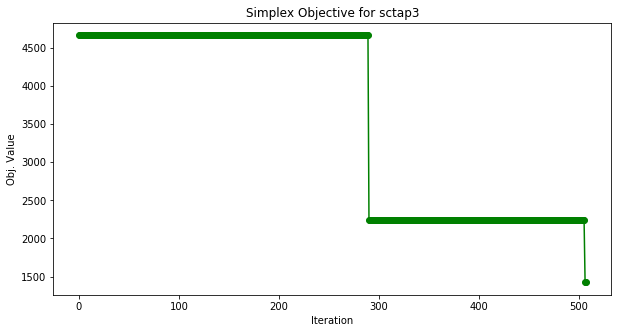

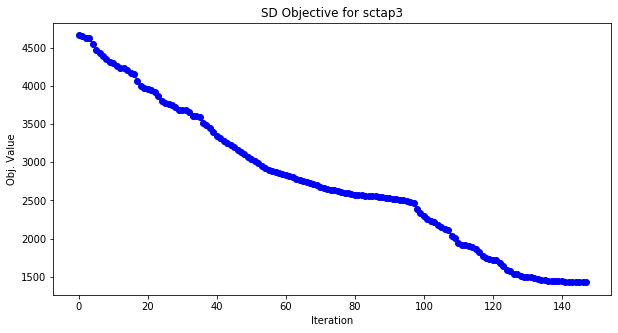






standmps


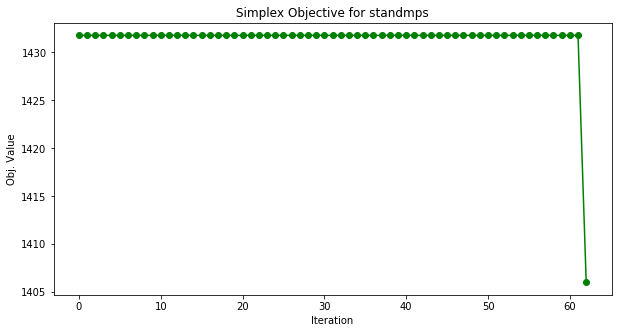

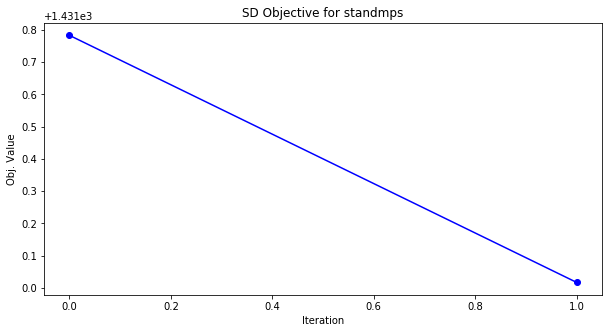






stocfor2


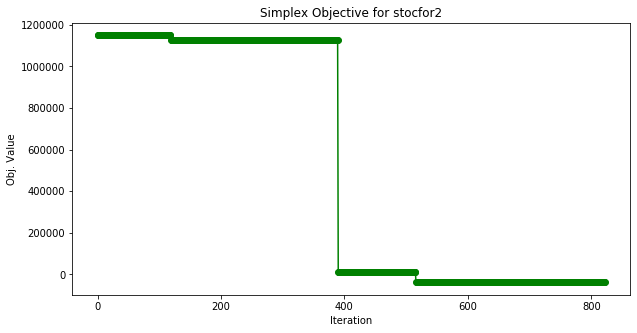

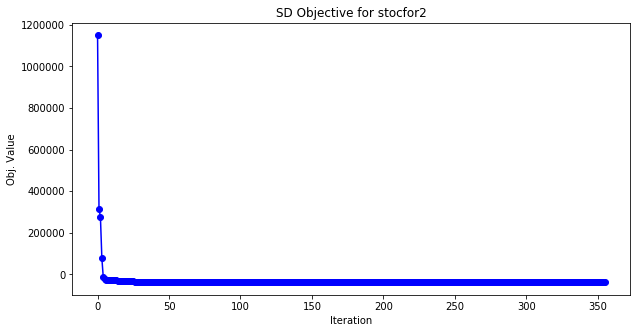






sctap1


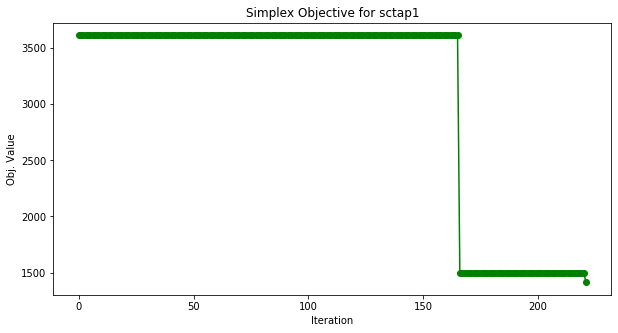

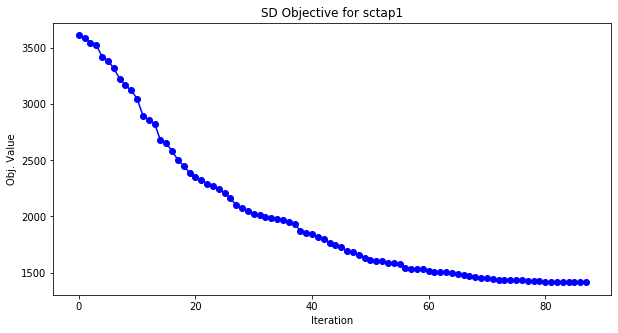






perold


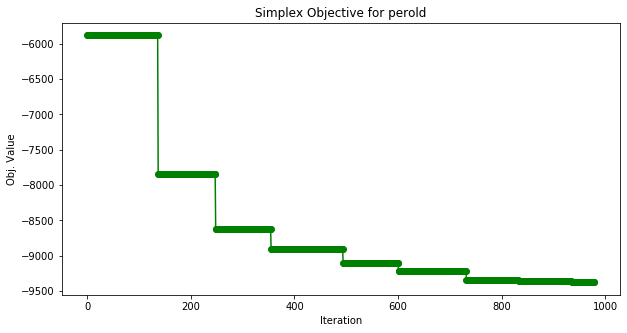

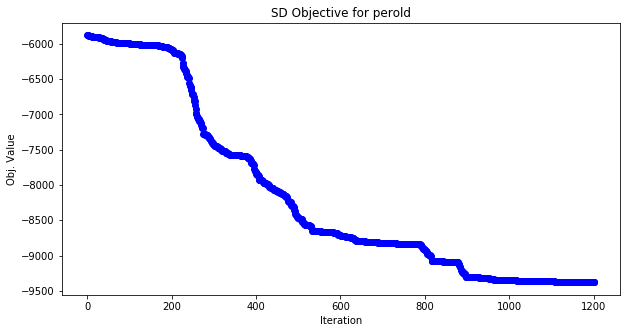






recipe


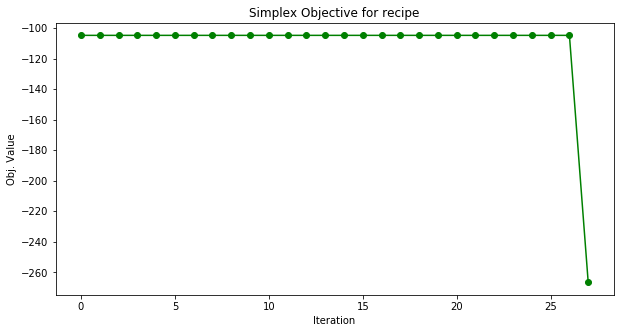

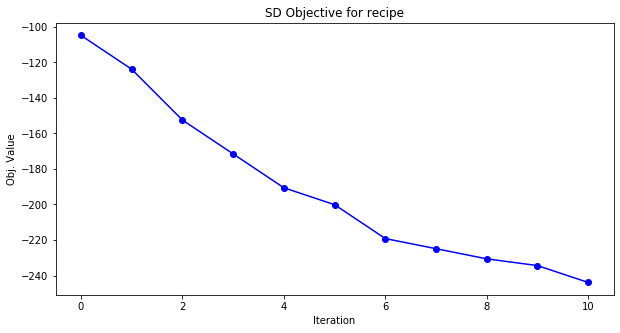






scsd8


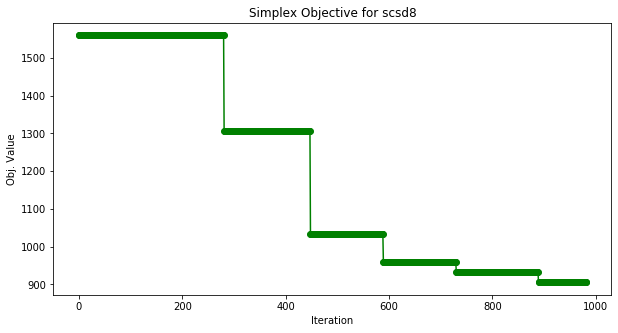

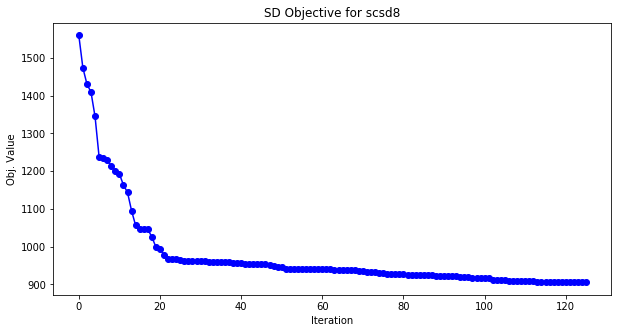






ship12l


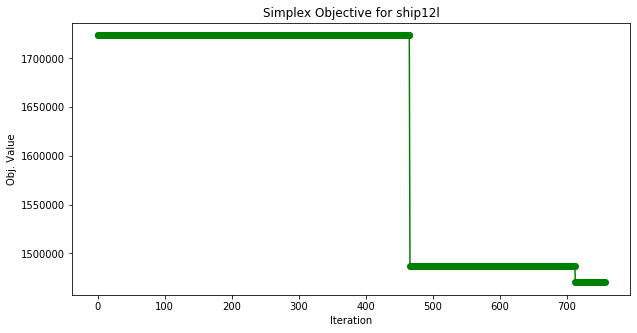

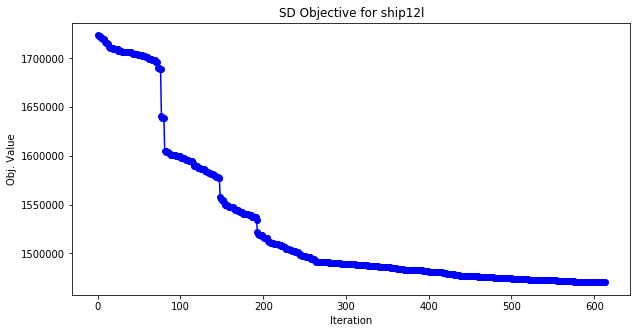






fit1d


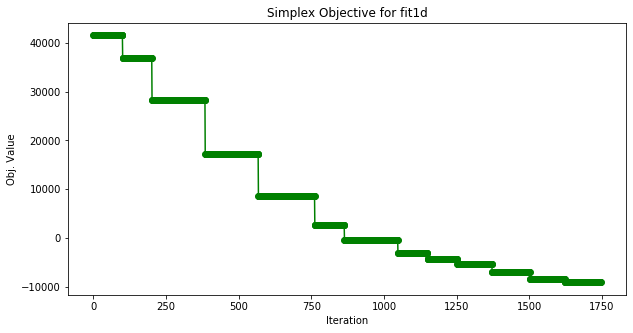

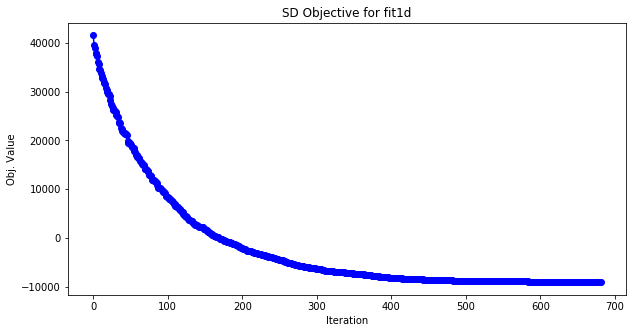






ship08l


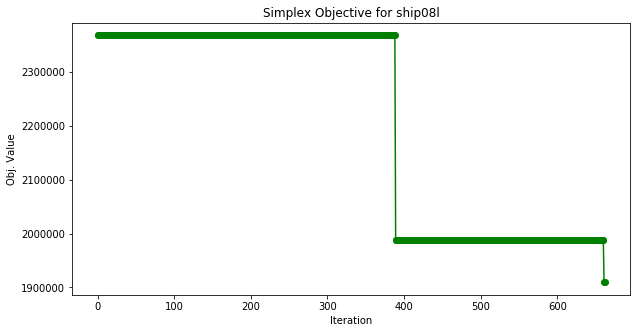

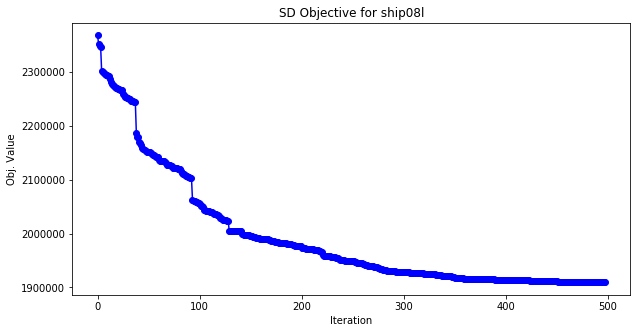






stocfor1


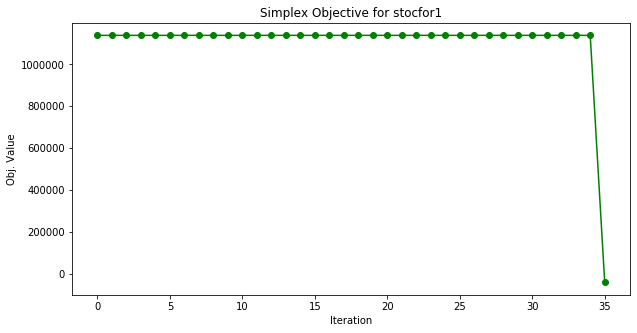

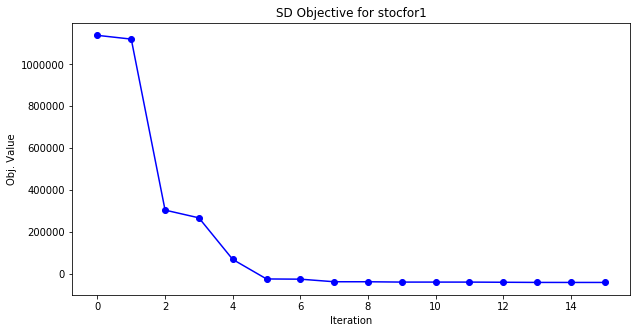






pilotnov


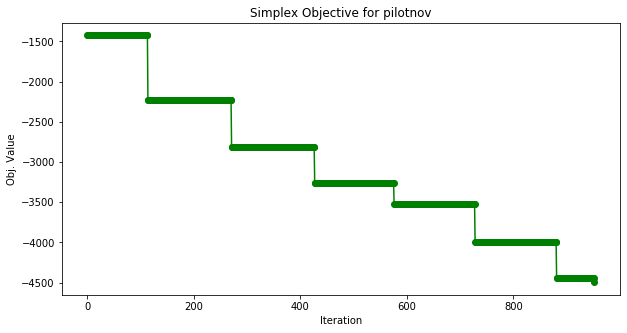

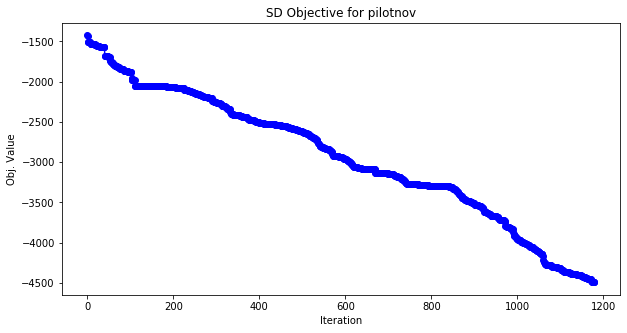






scorpion


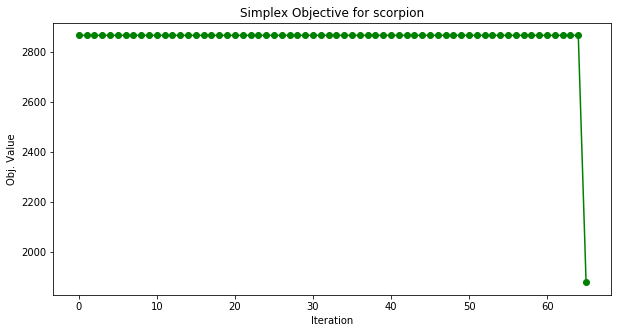

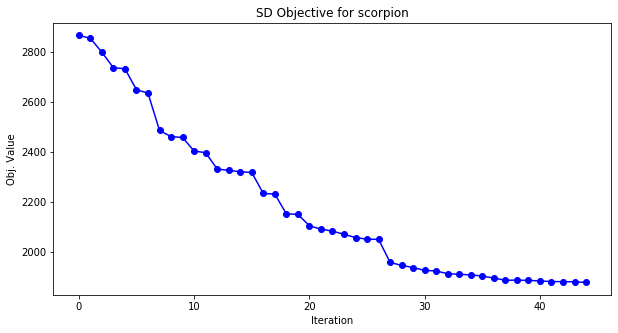






ship12s


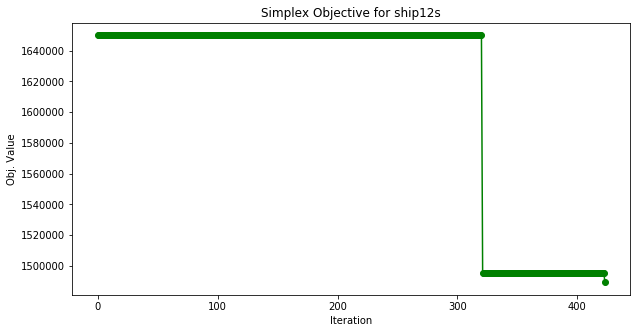

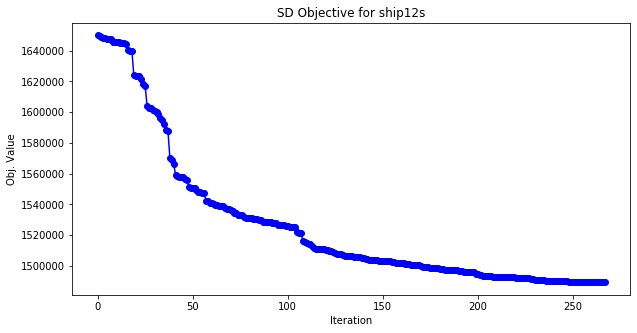






israel


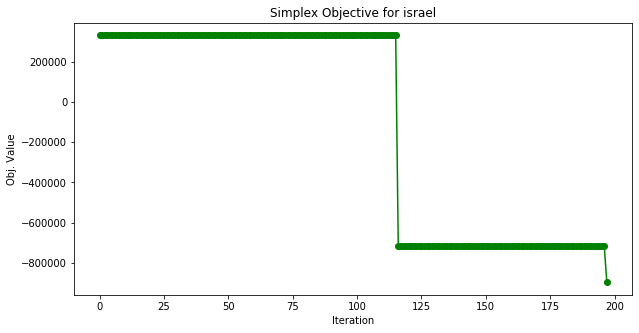

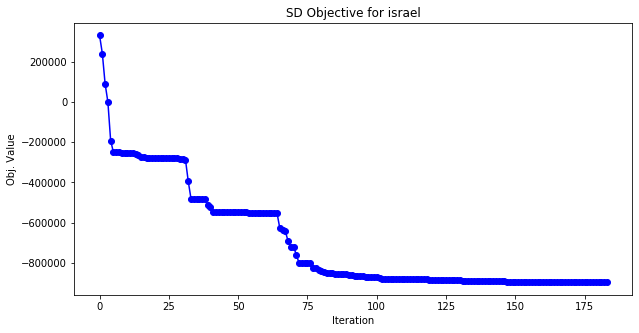






cycle


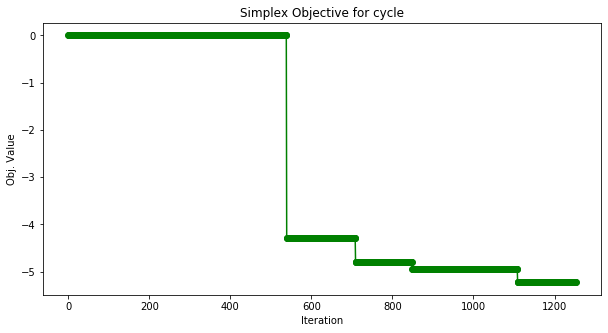

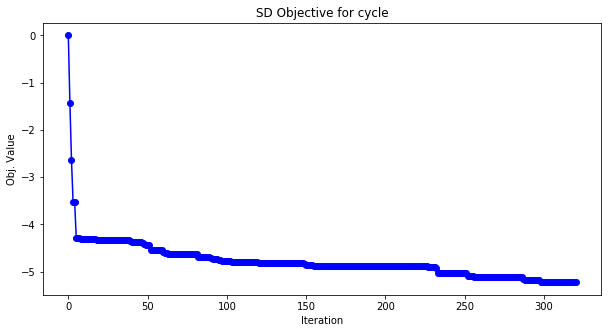






sc50b


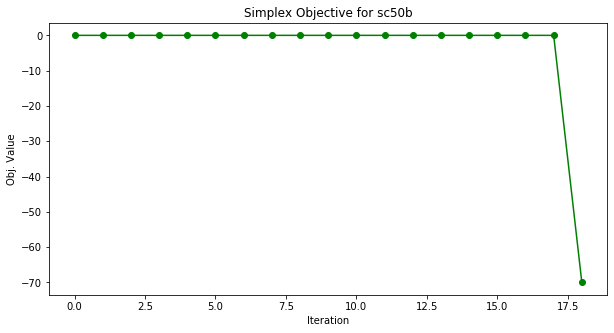

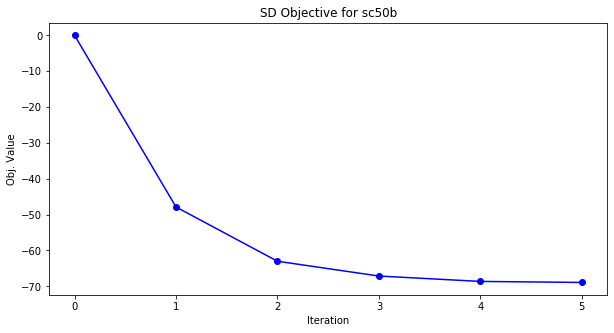






beaconfd


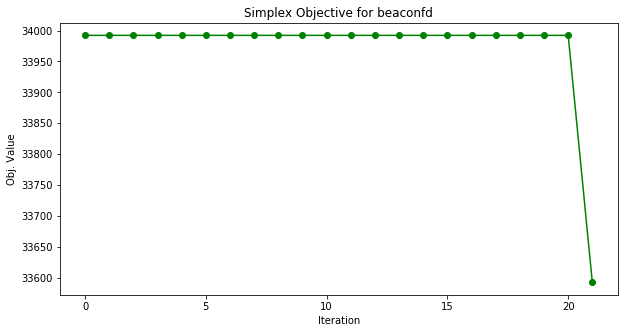

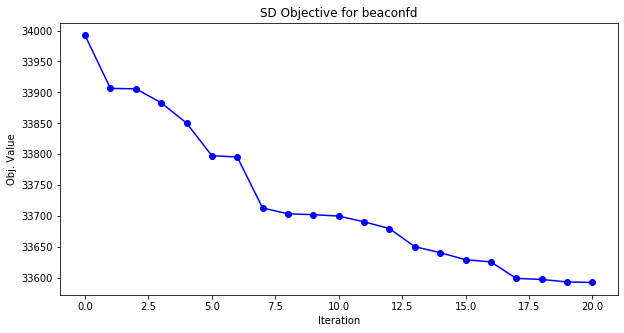






sierra


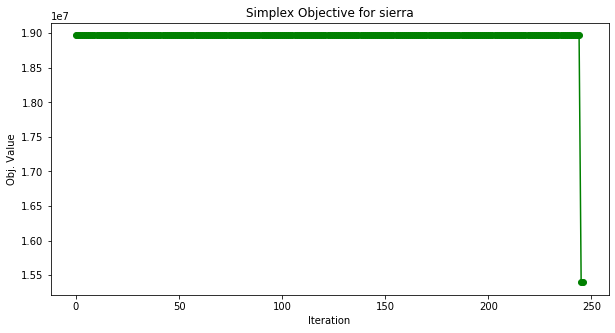

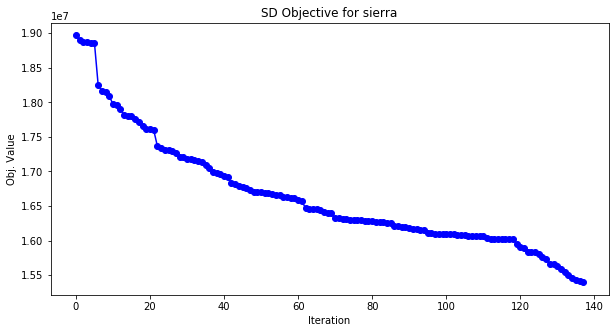






scsd1


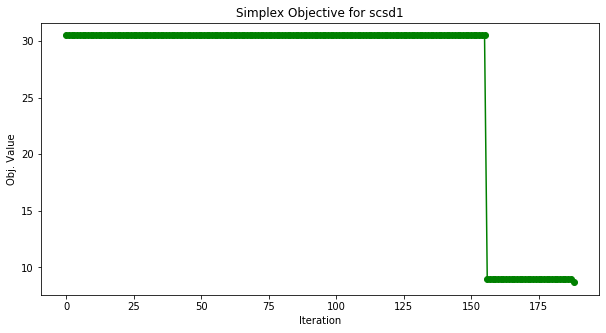

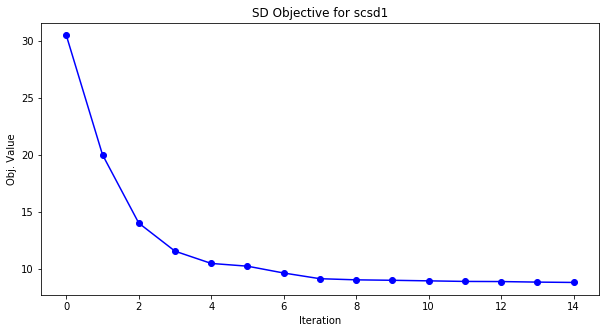






sc105


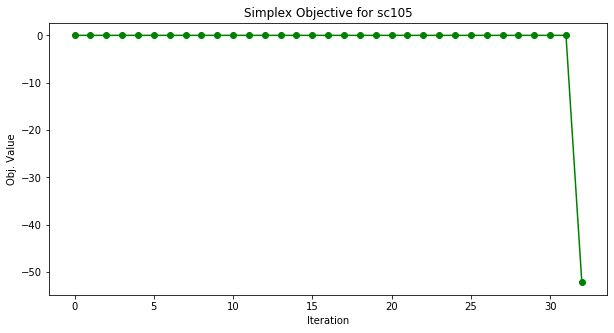

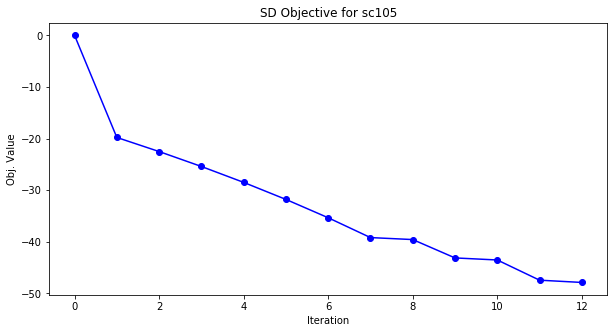






agg2


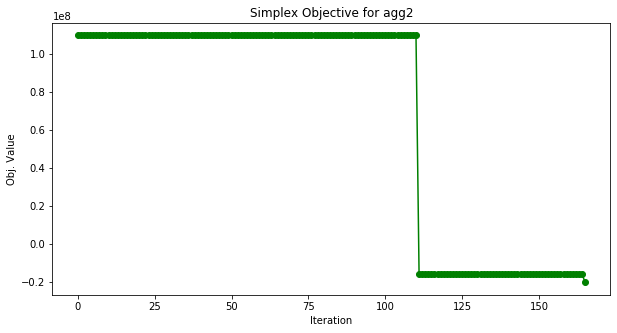

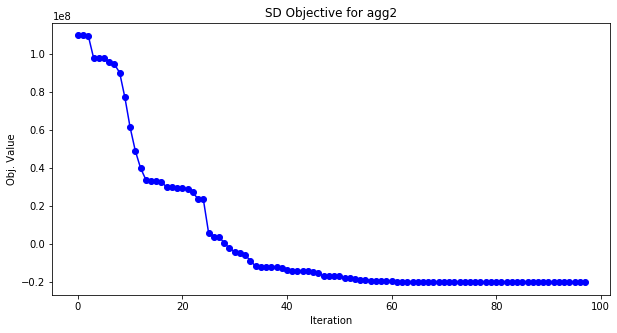






finnis


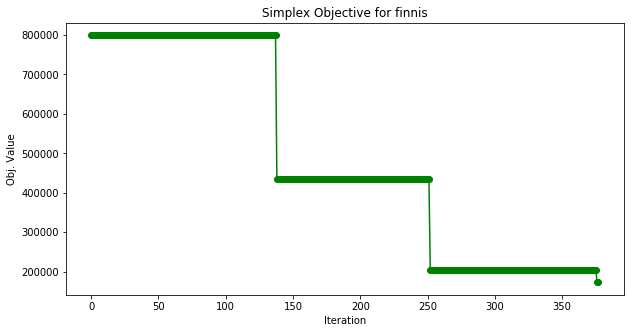

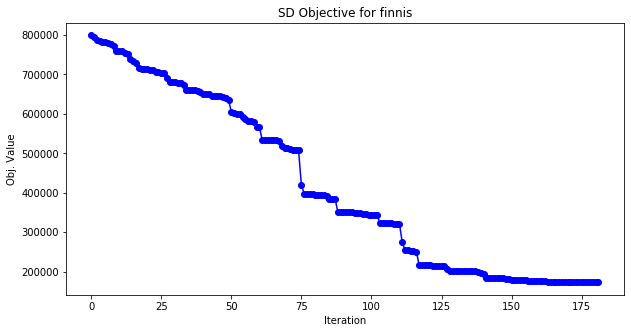






ganges


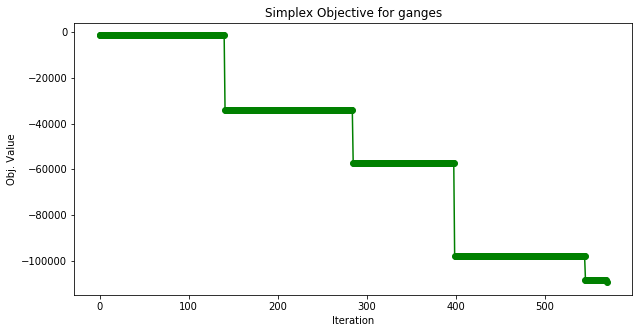

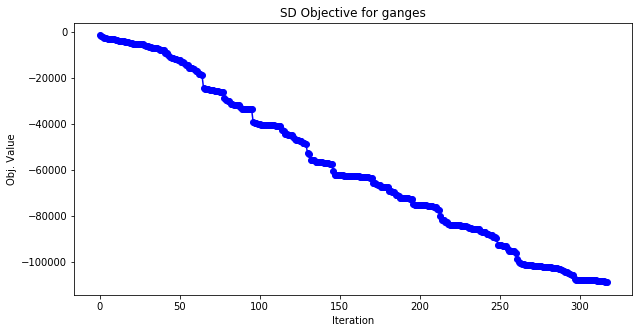






bandm


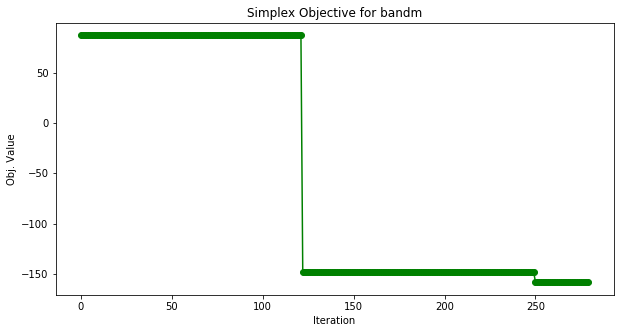

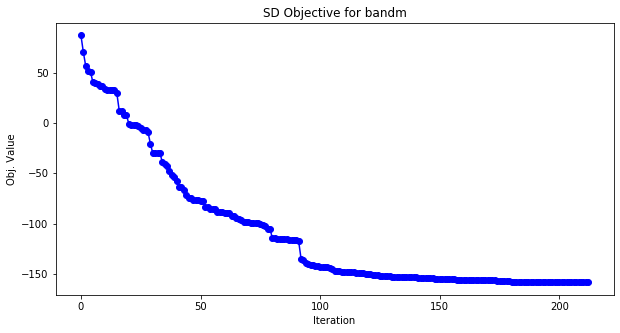






afiro


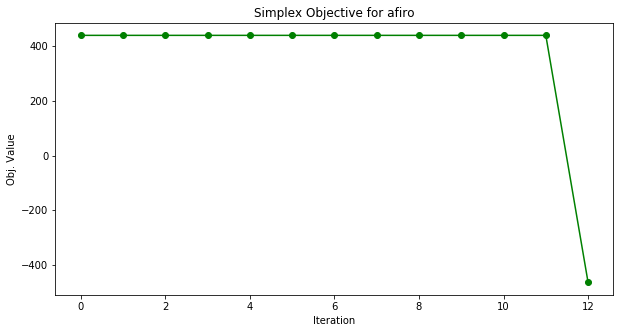

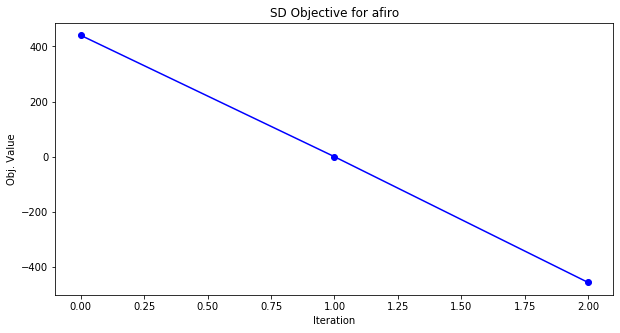






adlittle


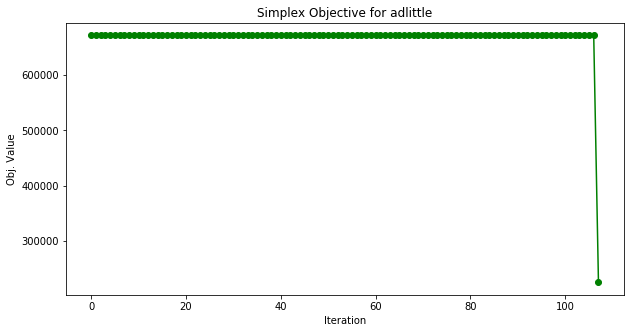

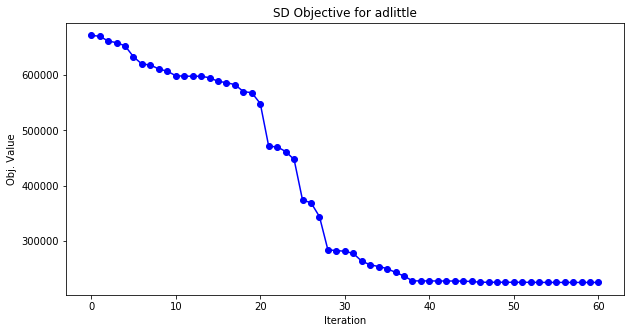






maros


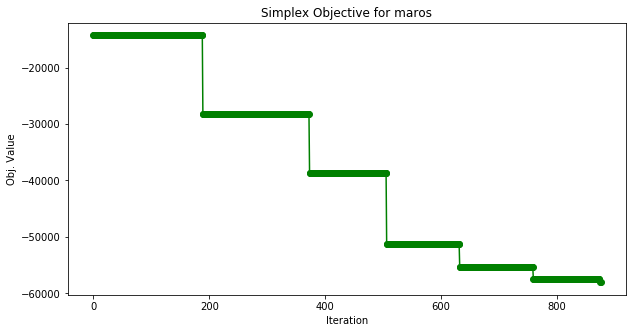

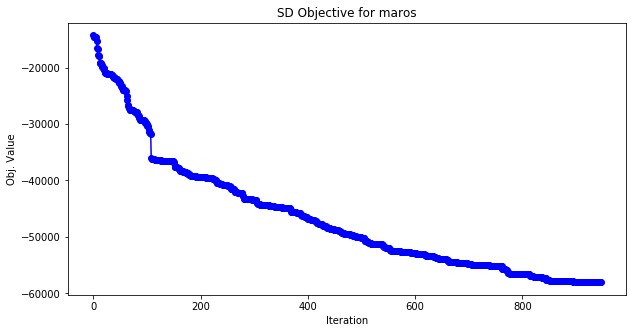






wood1p


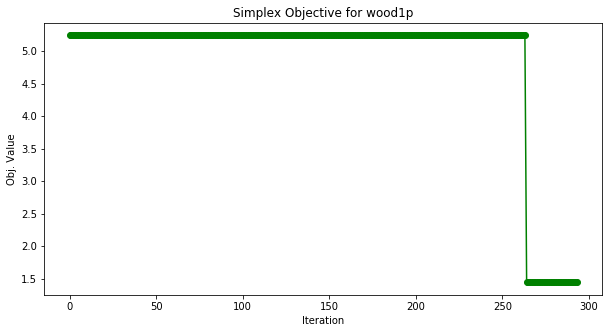

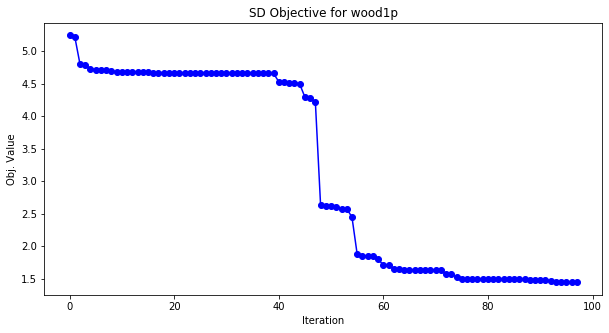






grow7


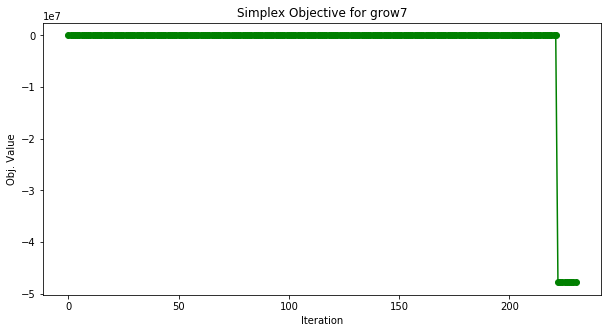

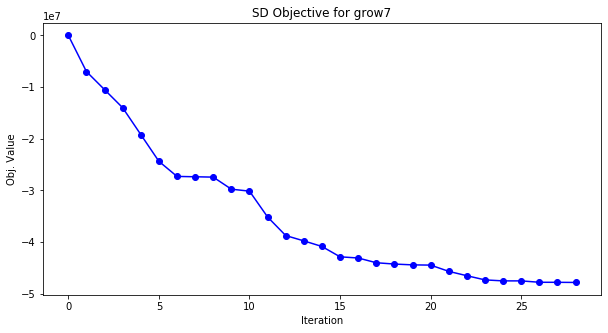






grow22


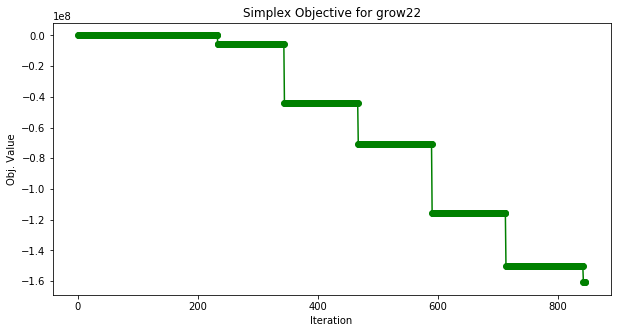

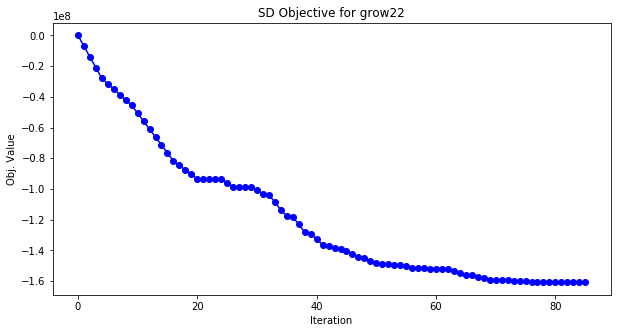






fffff800


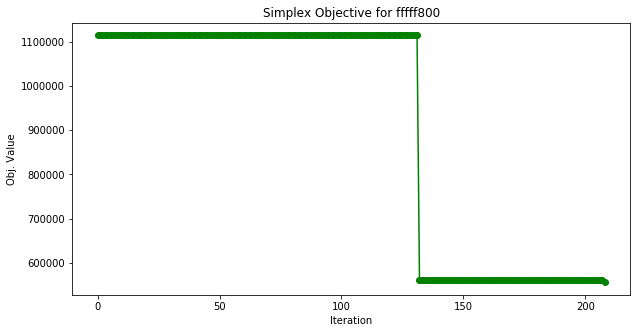

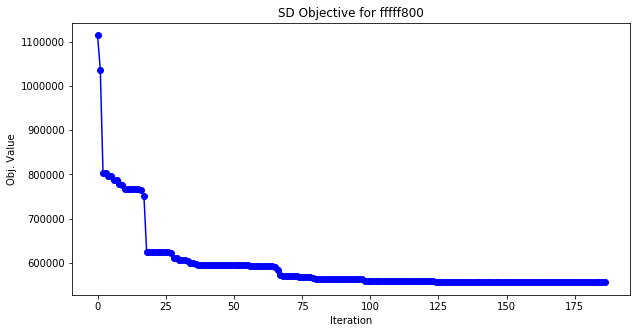






vtp


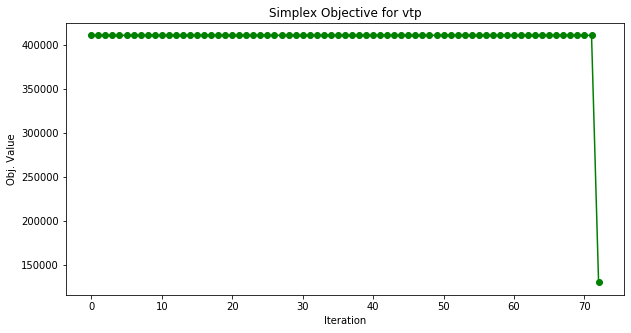

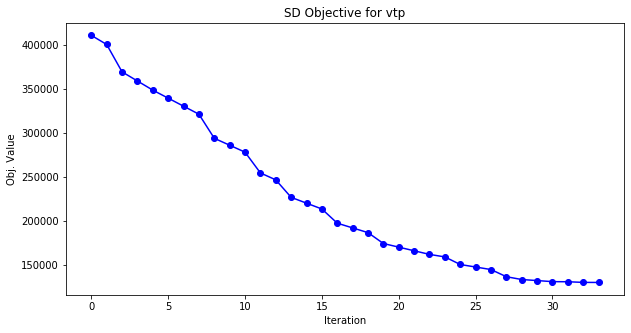






sc205


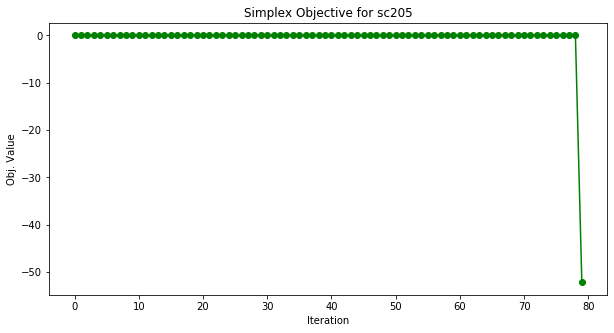

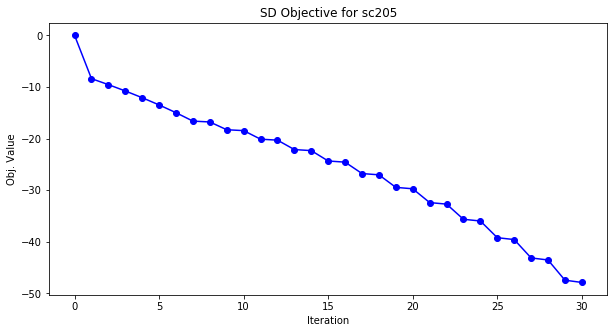






boeing1


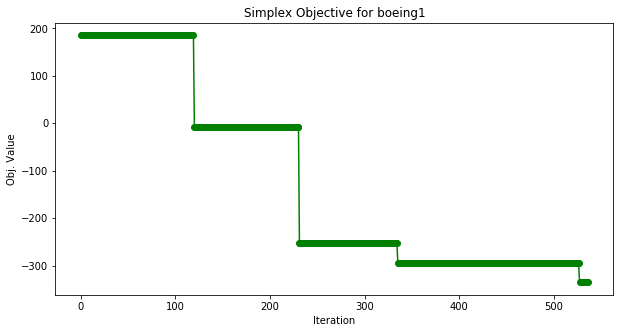

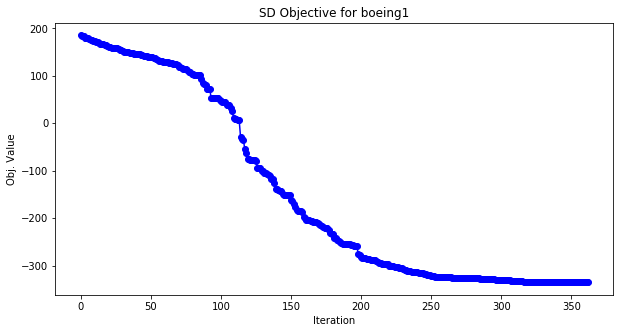






scagr25


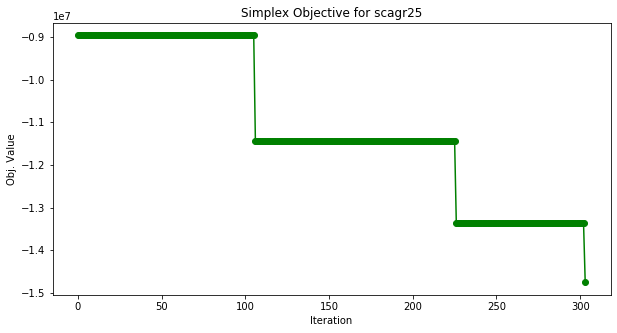

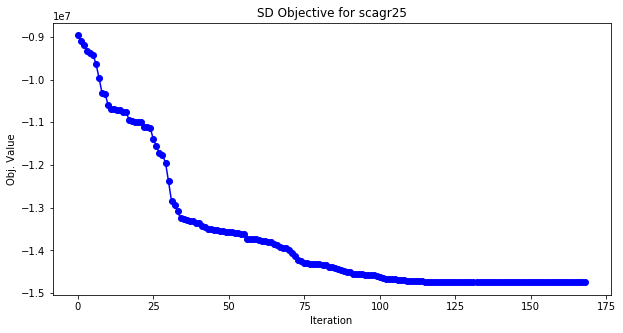






brandy


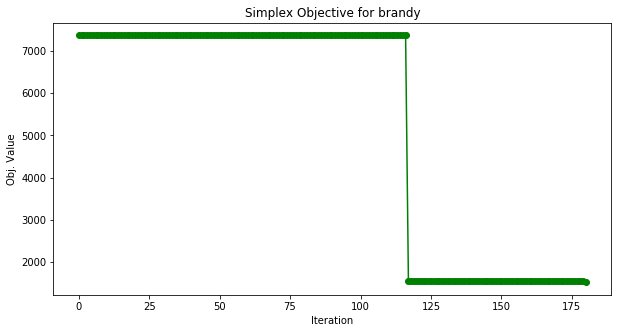

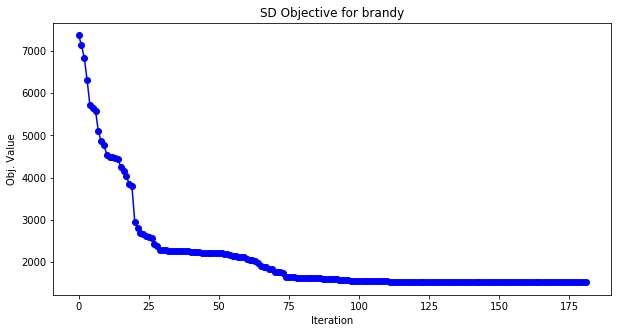






scagr7


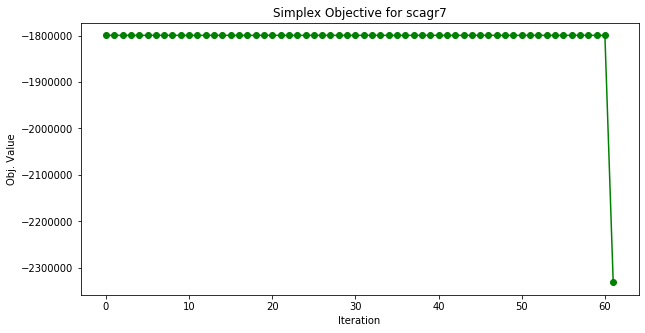

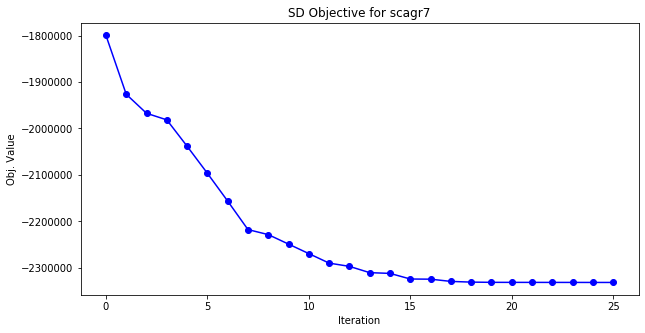






bnl1


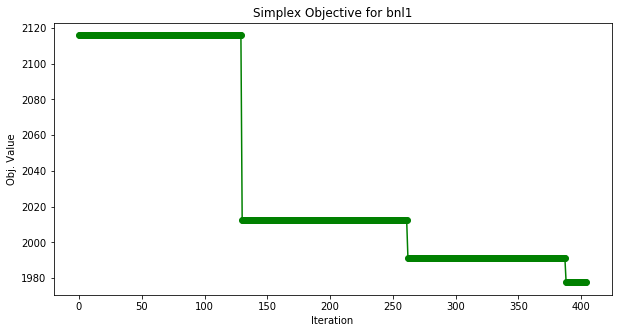

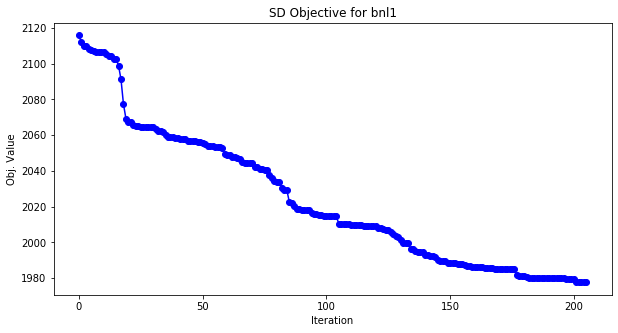






degen2


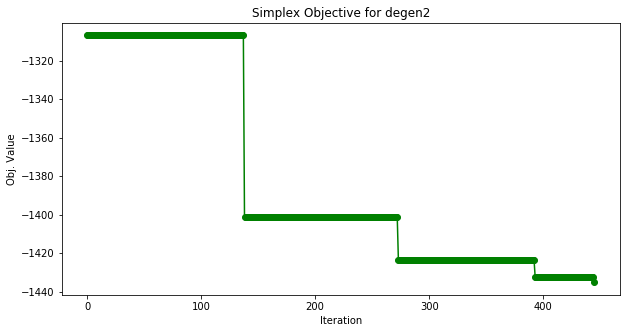

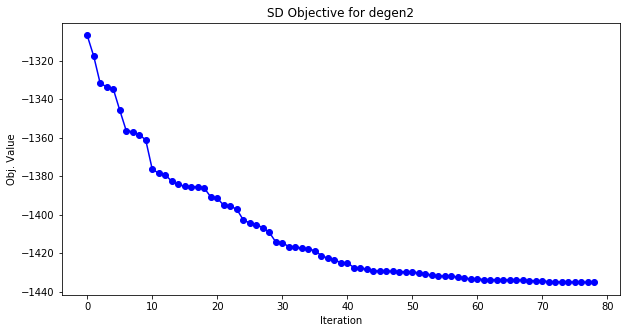






degen3


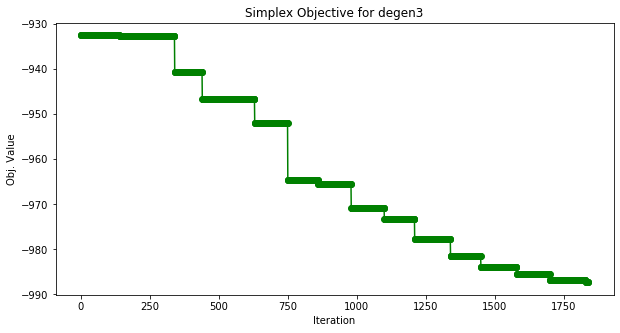

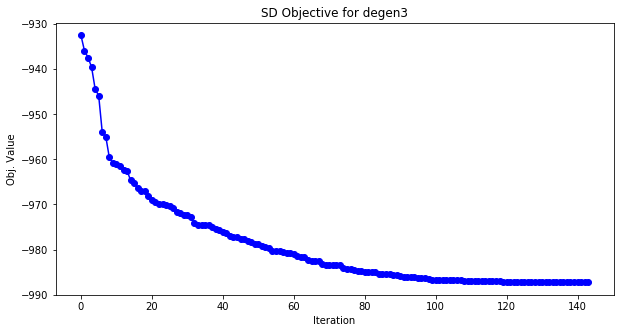






cre-c


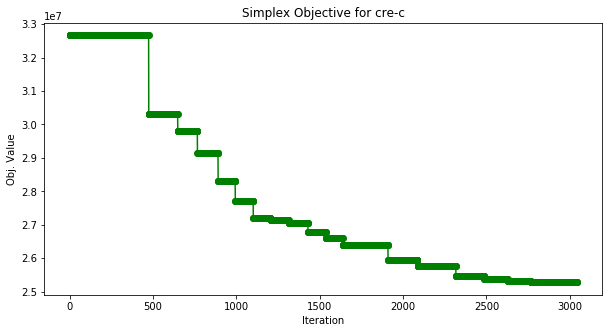

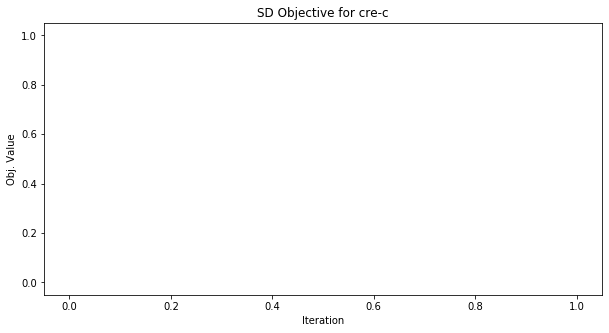






kb2


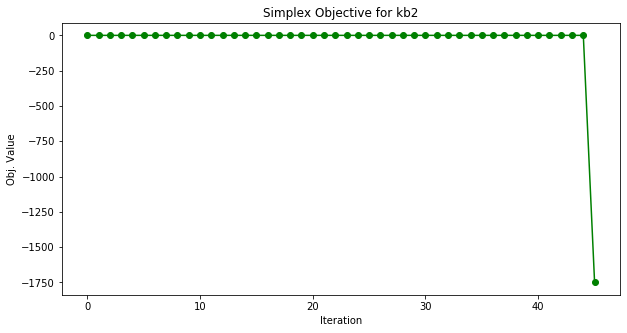

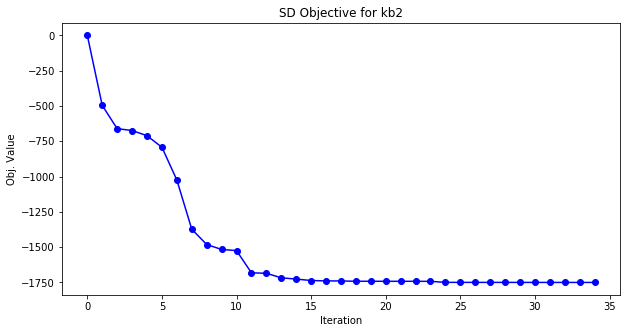






stair


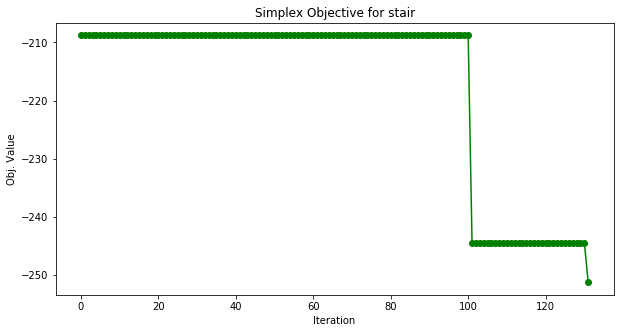

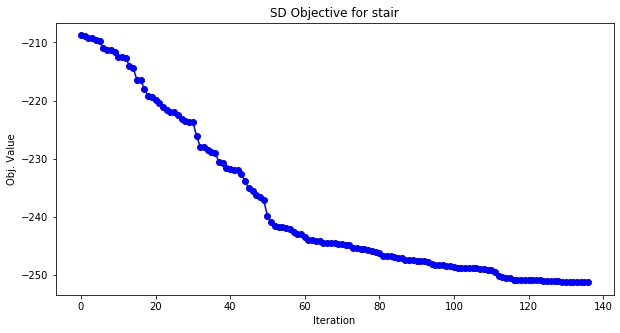






pilot


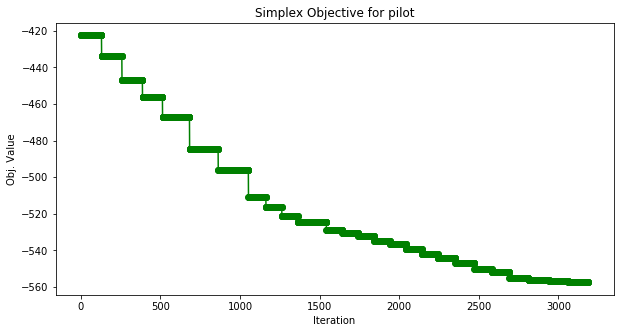

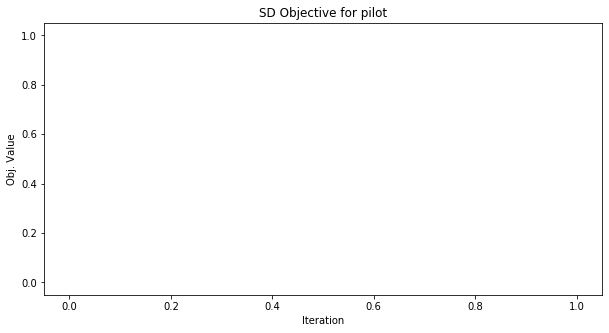






tuff


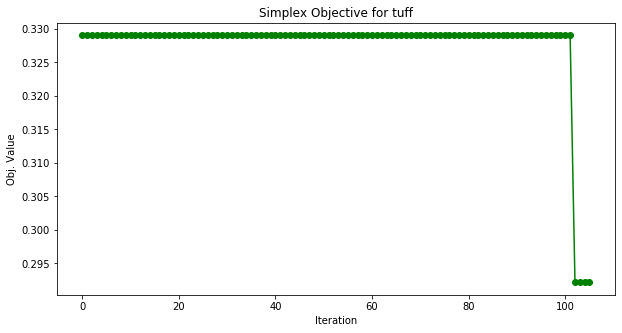

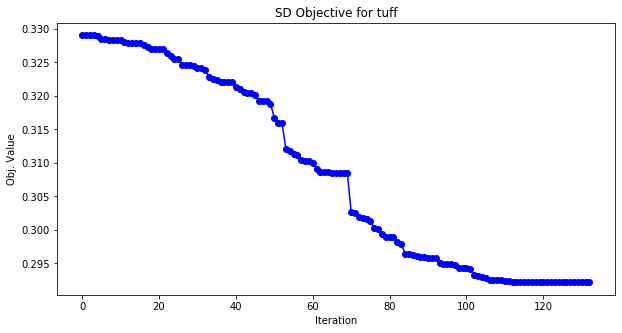






ship08s


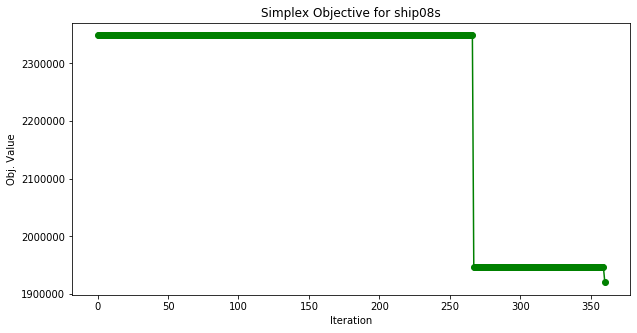

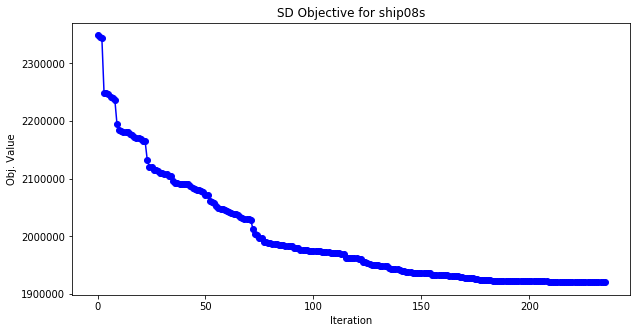






scrs8


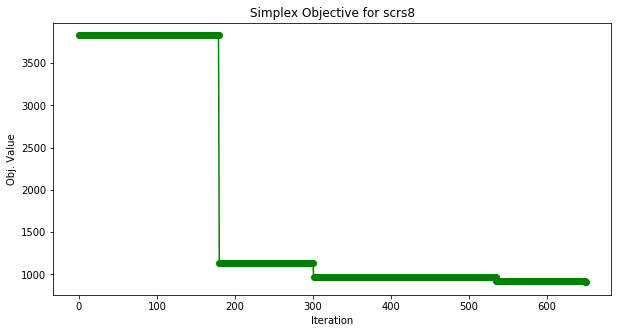

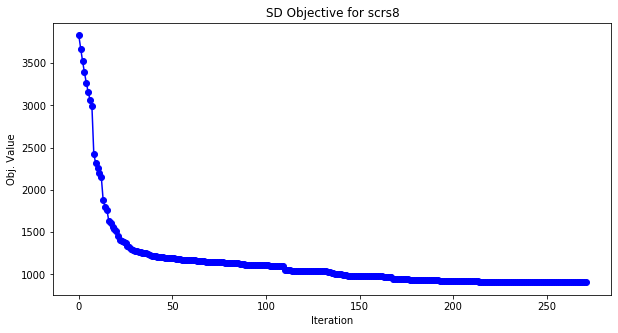






sctap2


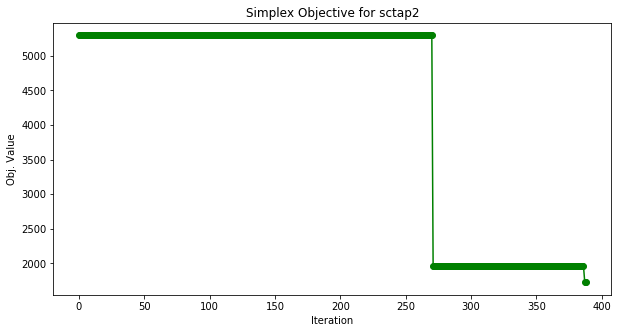

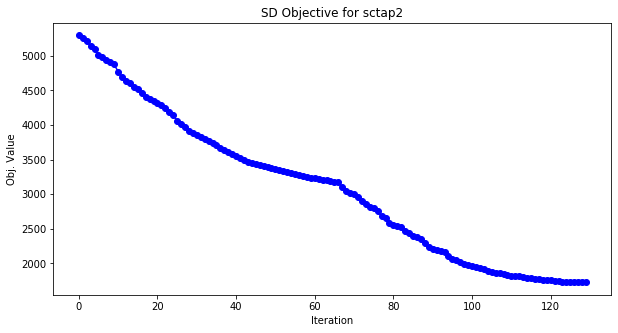






grow15


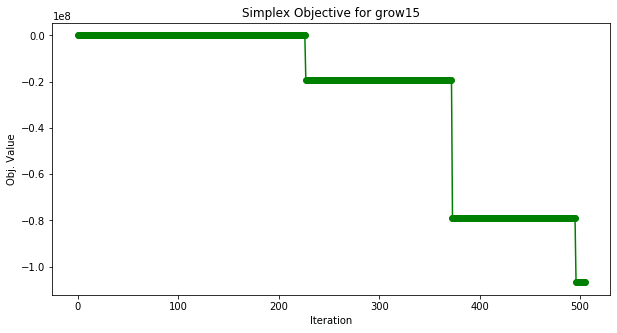

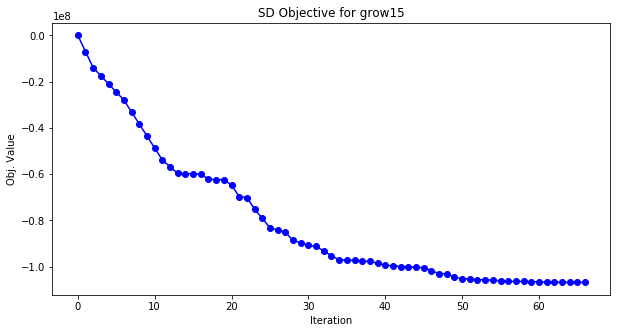






pilot4


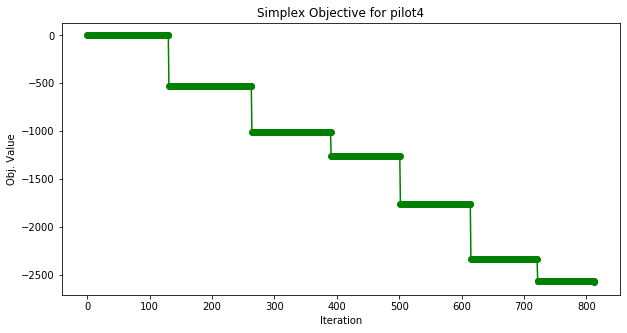

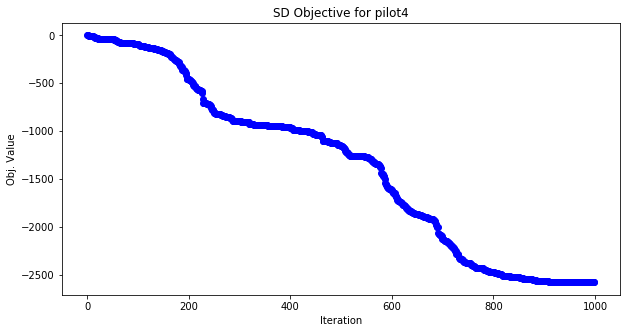






fit1p


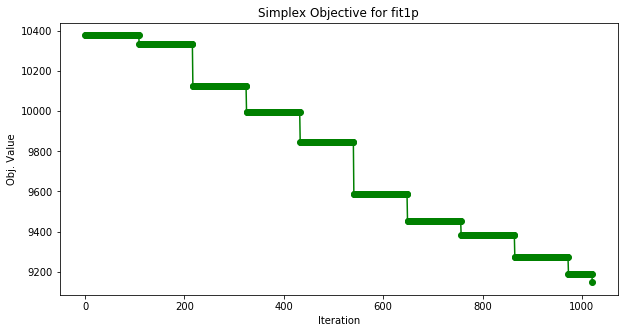

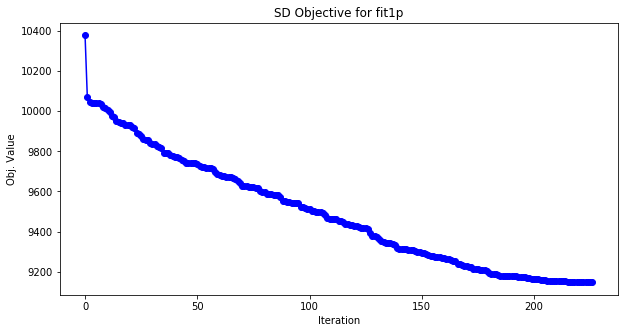






gfrd-pnc


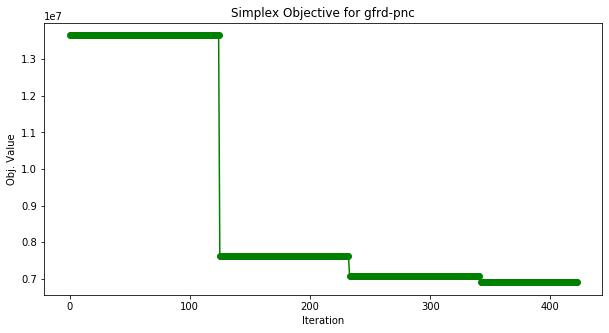

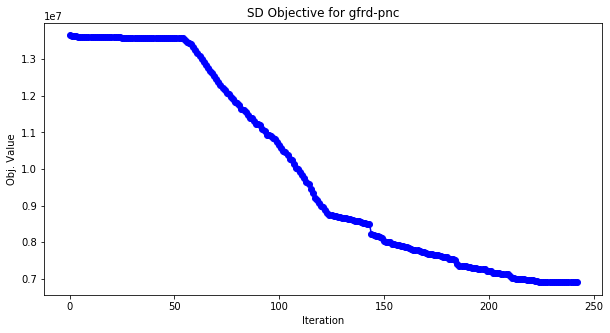






standgub


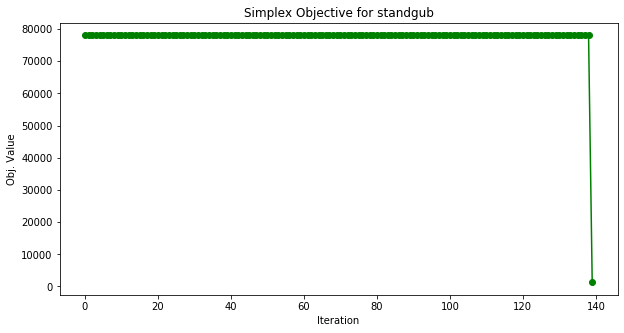

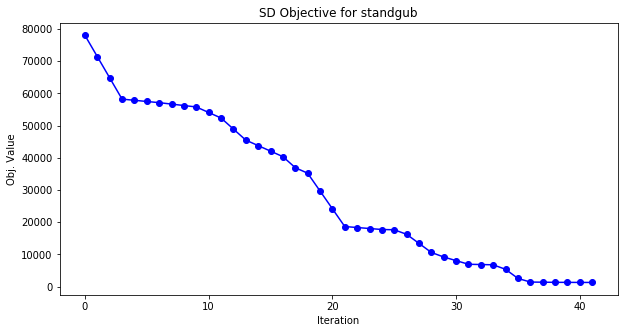






lotfi


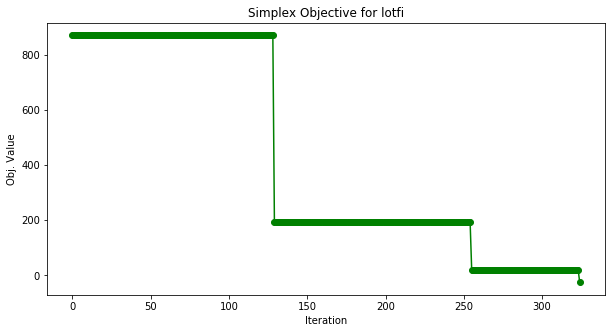

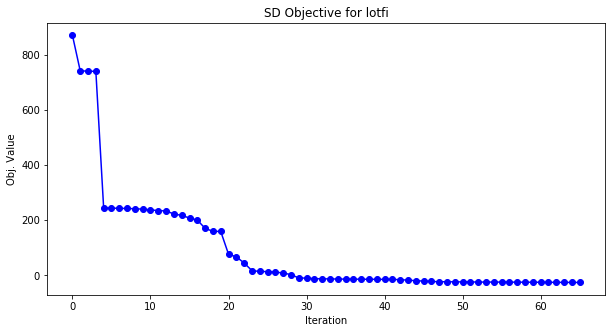






agg3


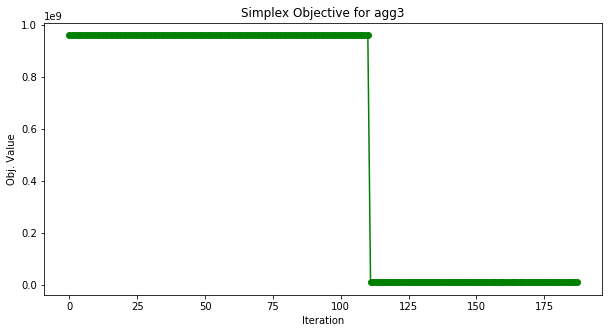

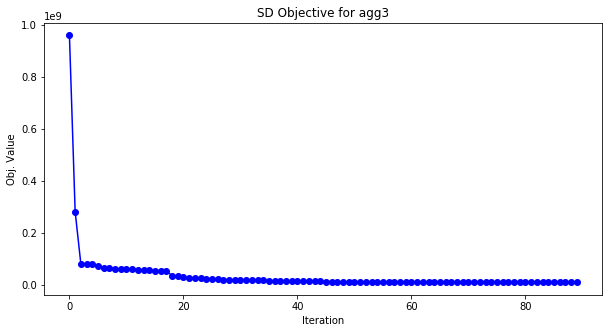






bore3d


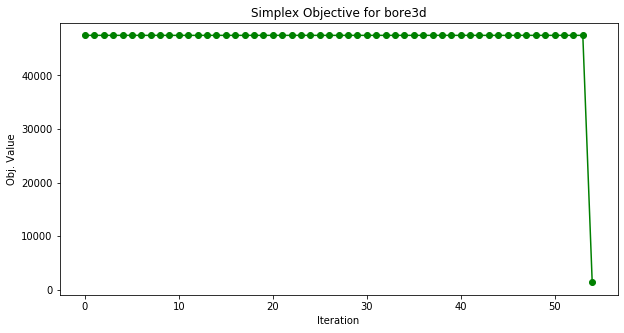

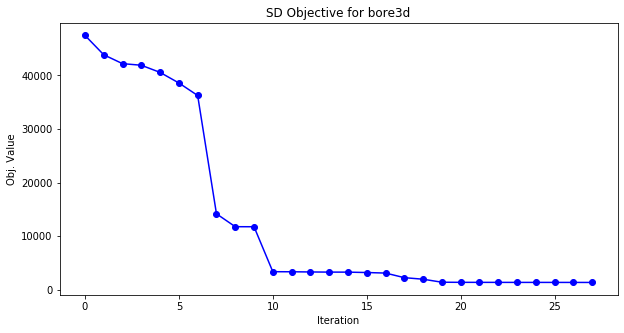






qap08


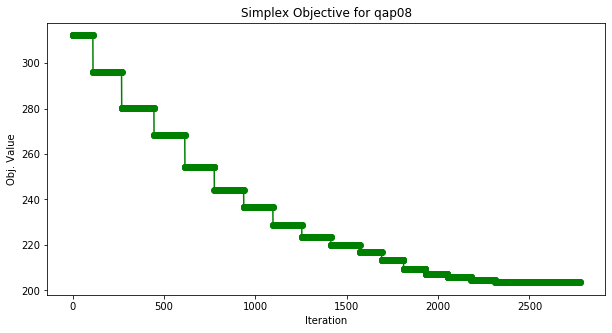

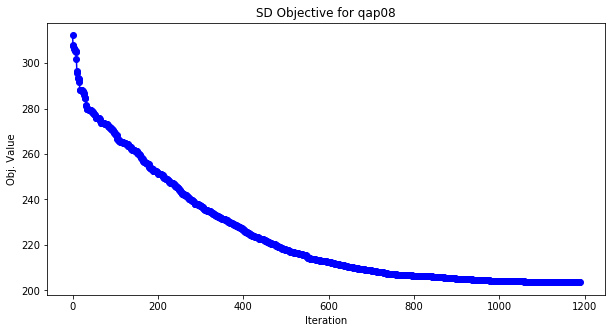






share1b


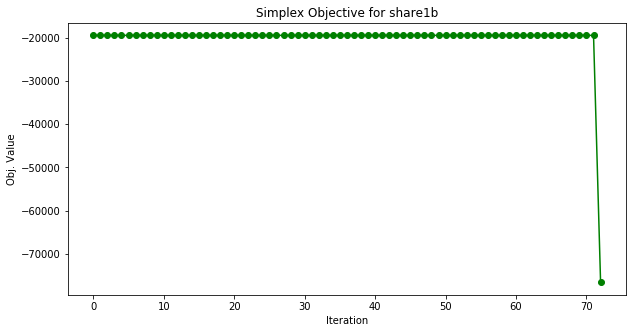

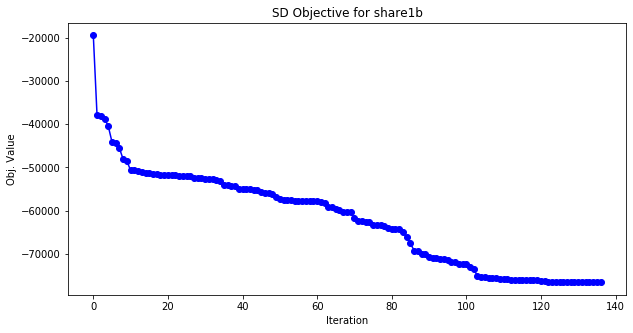






seba


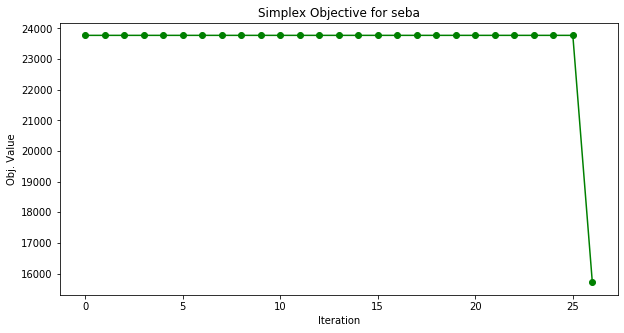

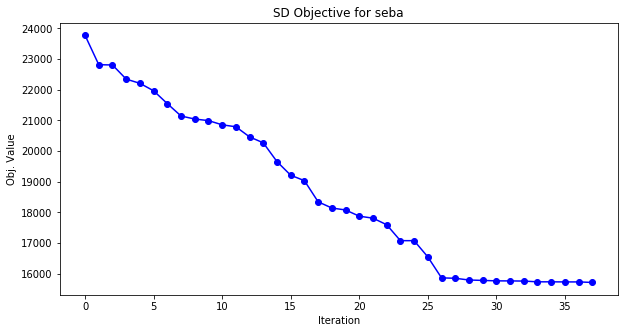






shell


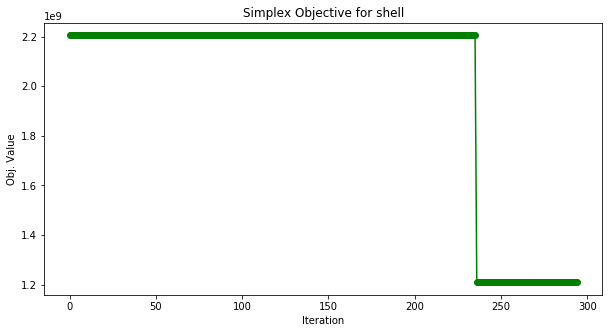

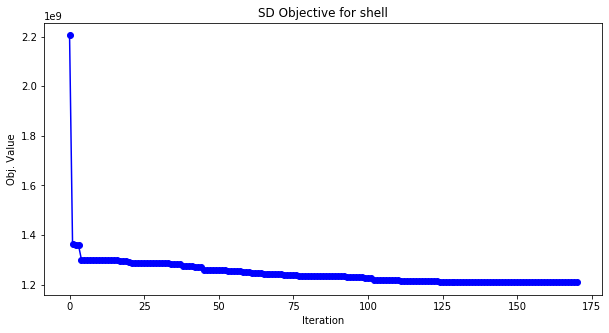






sc50a


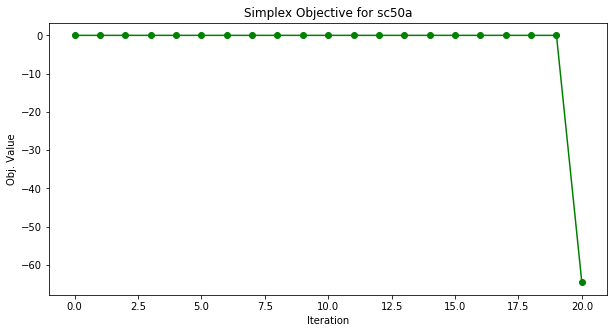

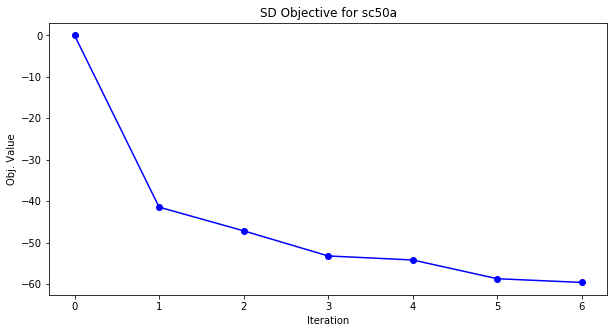






share2b


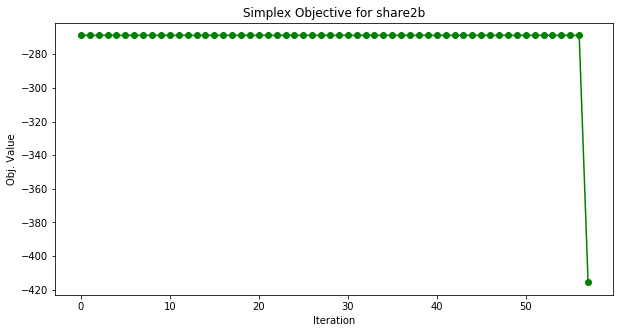

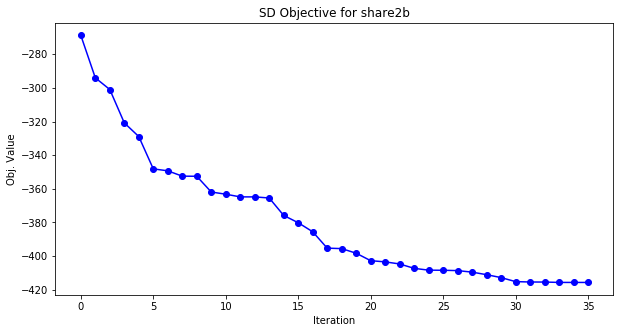






scsd6


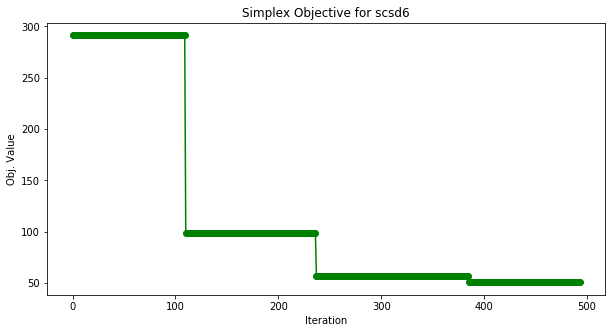

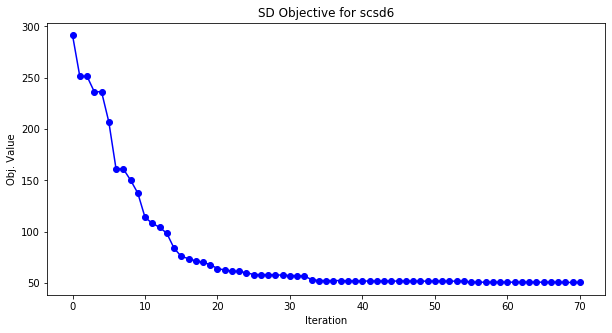






ship04s


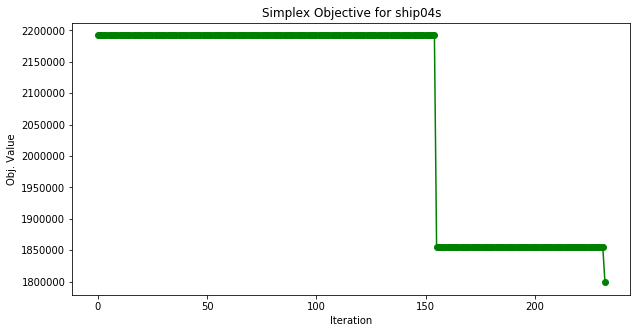

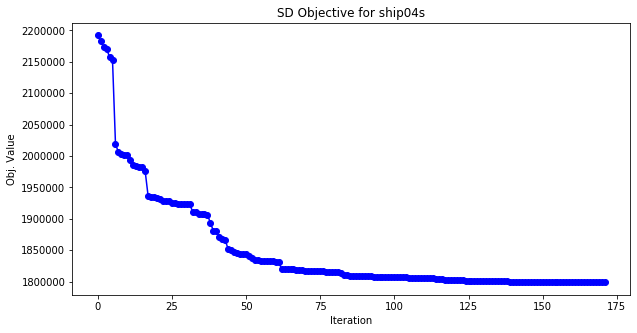






etamacro


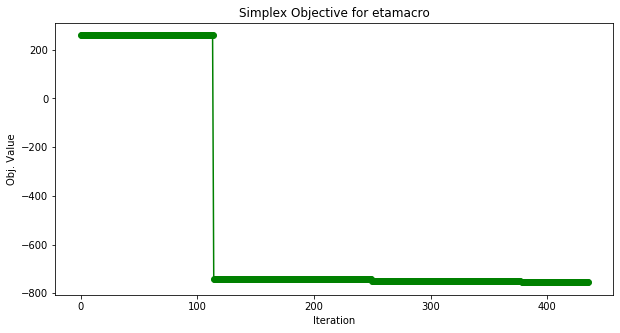

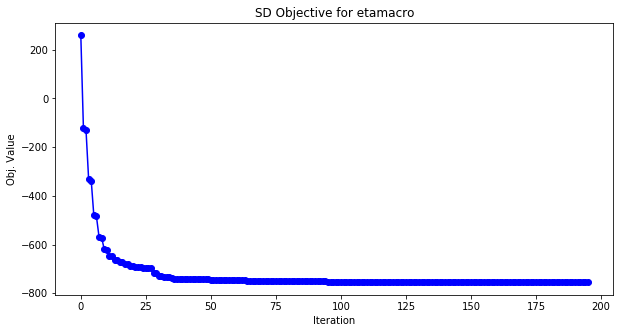






scfxm3


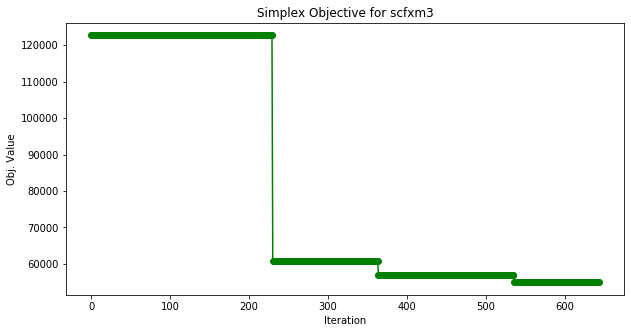

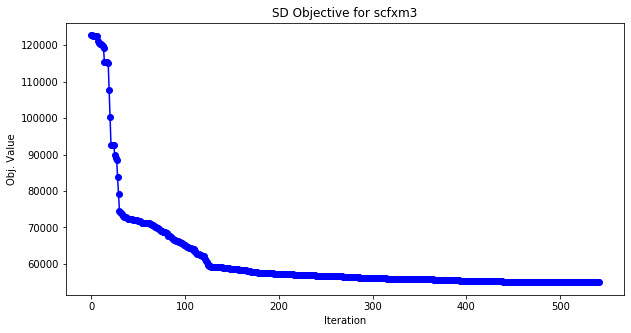






standata


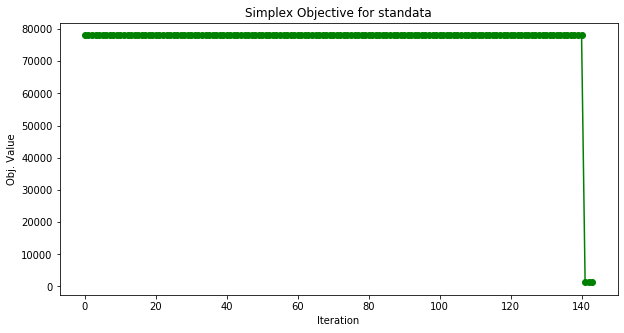

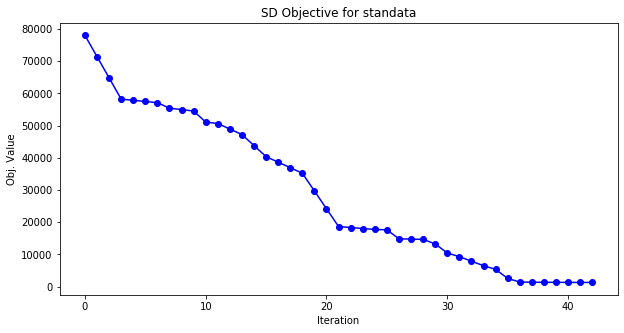






boeing2


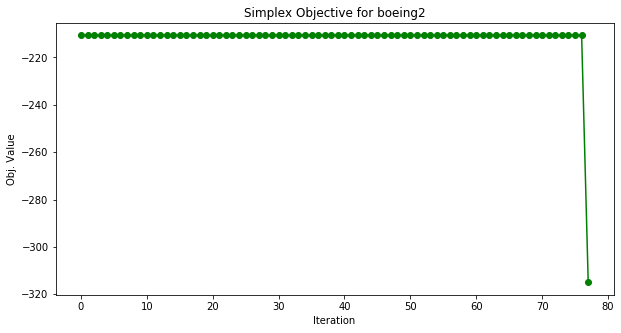

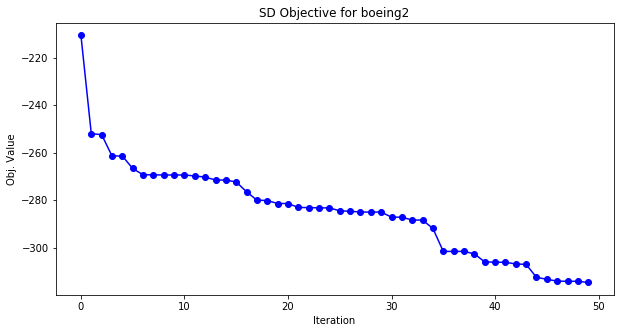






scfxm2


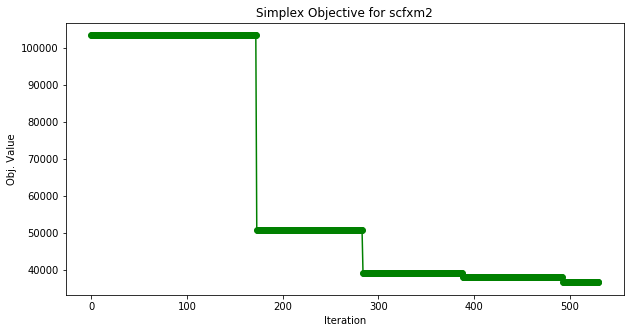

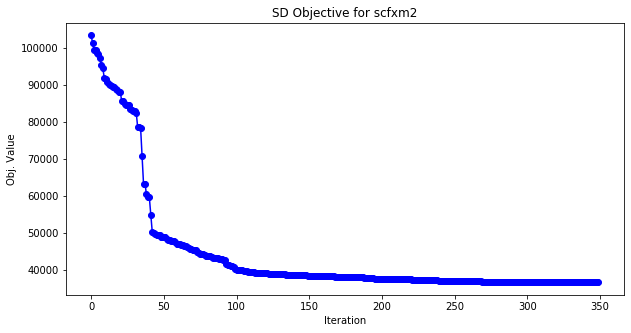






capri


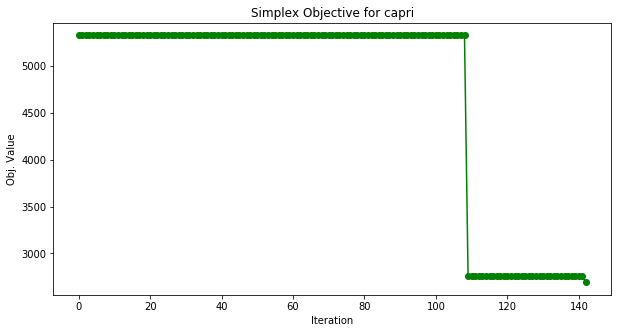

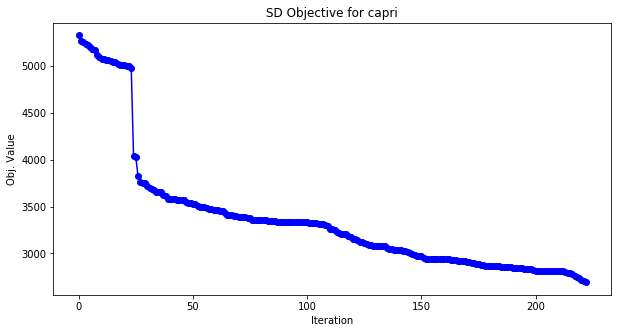






agg


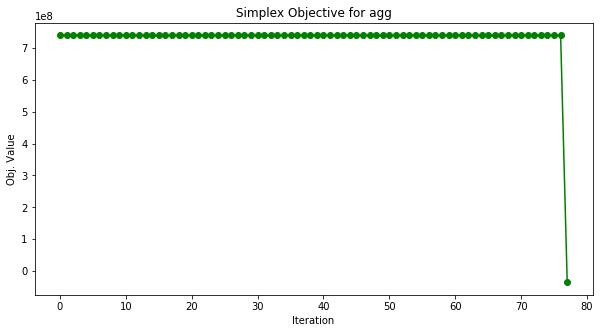

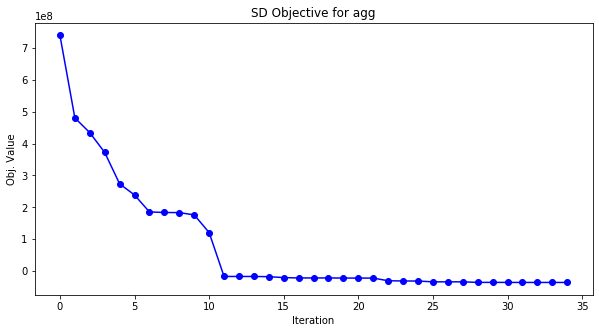






e226


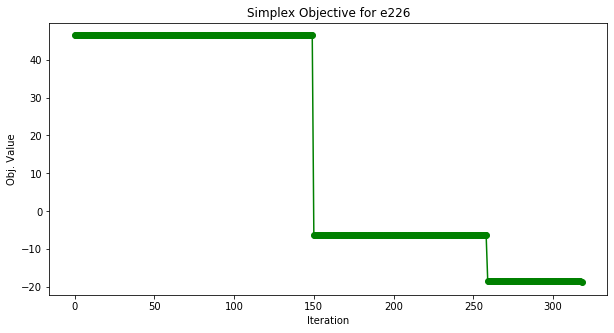

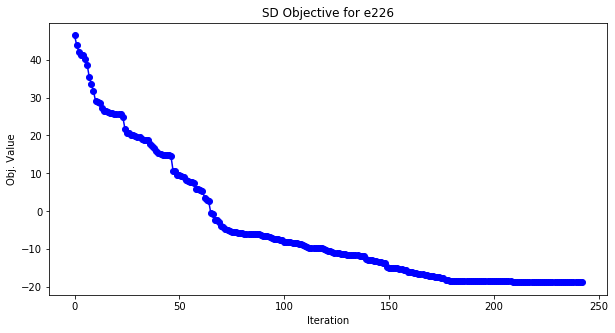






ken-07


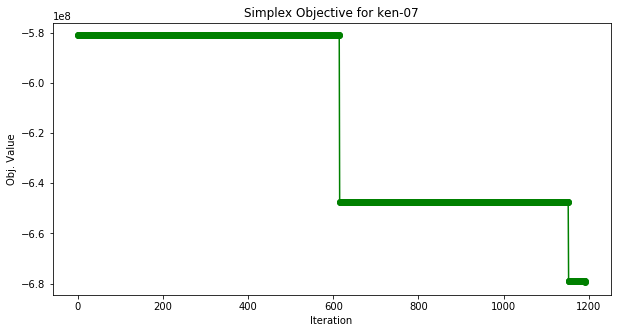

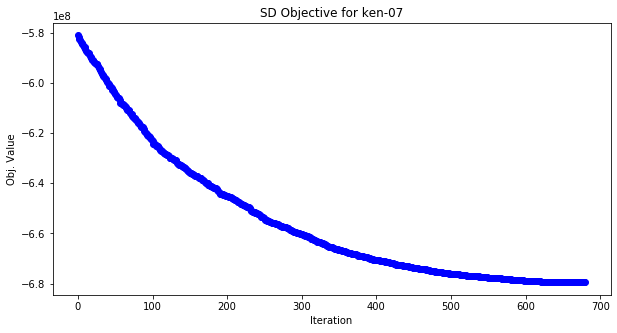






pds-02


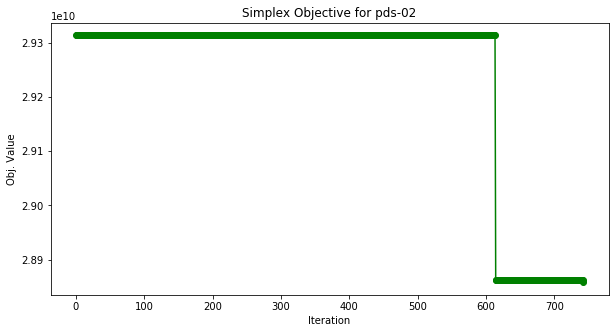

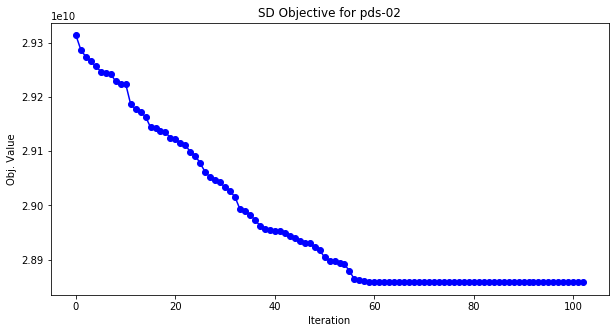






forplan


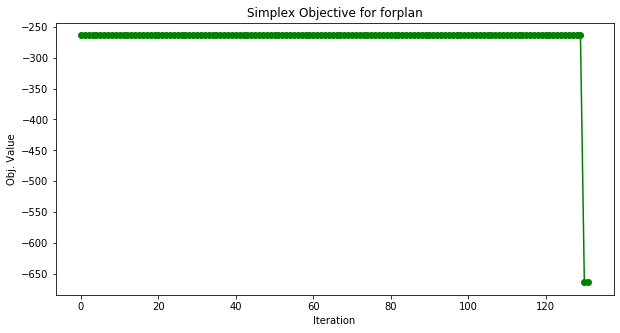

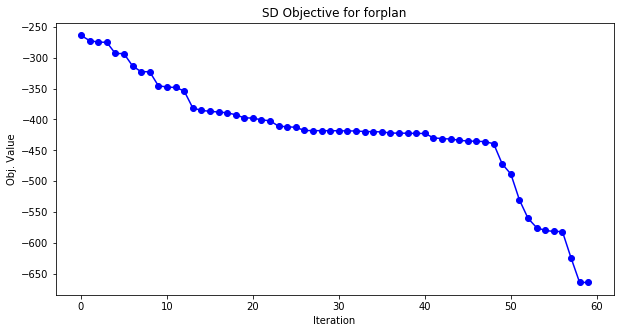






modszk1


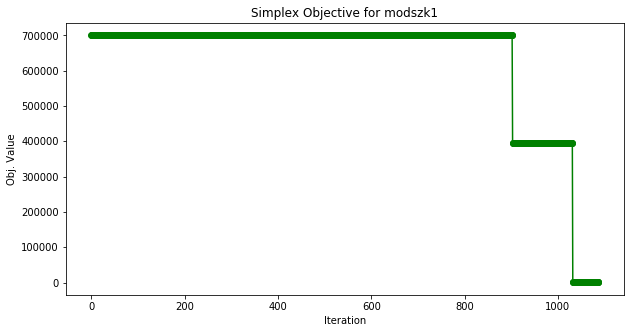

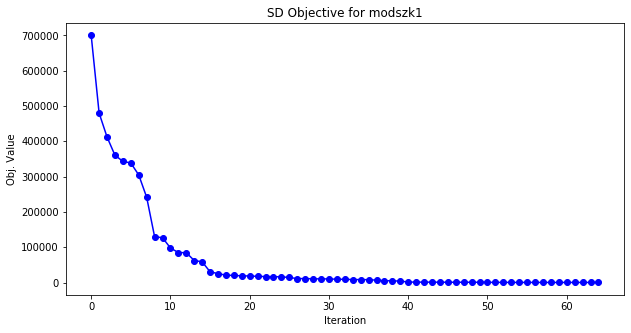






scfxm1


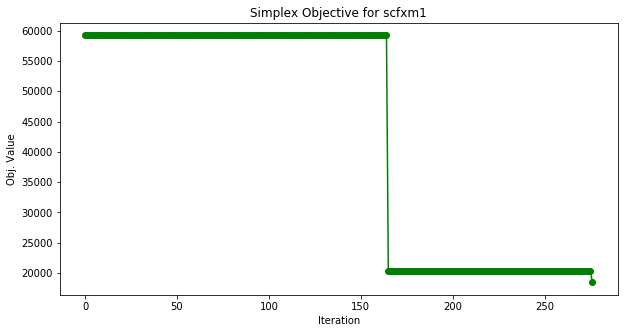

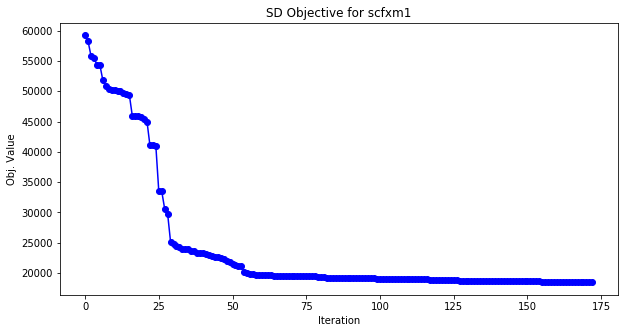






blend


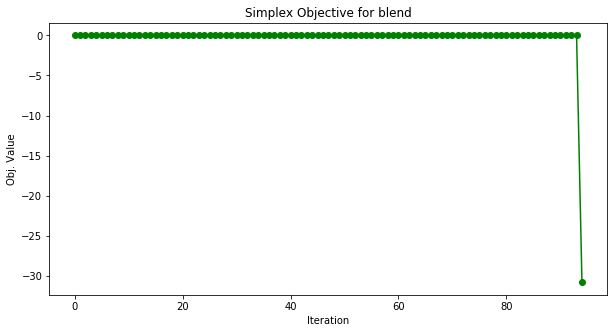

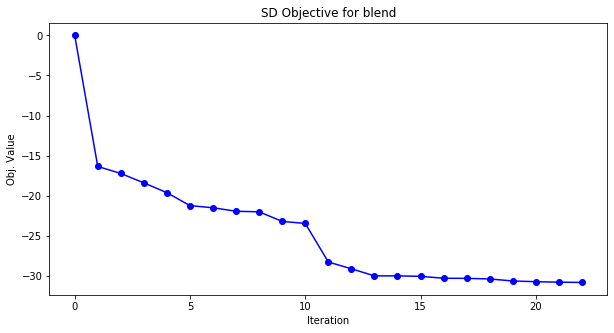






ship04l


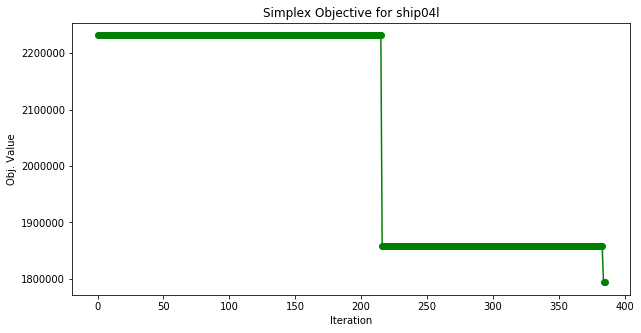

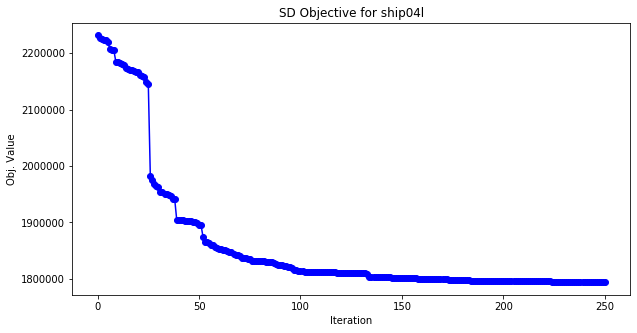

In [2]:
inds = list(range(len(sd_results_fns)))
random.shuffle(inds)
max_probs = 100


for ind in inds[:max_probs]:
    lp_fn = lp_results_fns[ind]
    sd_fn = sd_results_fns[ind]
    problem_name = os.path.basename(lp_fn).split('_')[0]
    print(problem_name)
    
    with open(lp_fn, 'rb') as f:
        lp_results = pickle.load(f)
    with open(sd_fn, 'rb') as f:
        sd_results = pickle.load(f)
        
    lp_results['obj_values'].append(lp_results['obj'])    
    plt.figure(figsize=(10,5))
    plt.title('Simplex Objective for {}'.format(problem_name))
    plt.xlabel('Iteration')
    plt.ylabel('Obj. Value')
    plt.plot(list(range(len(lp_results['obj_values']))), lp_results['obj_values'], 'go-')
    plt.show()
    
    plt.figure(figsize=(10,5))
    plt.title('SD Objective for {}'.format(problem_name))
    plt.xlabel('Iteration')
    plt.ylabel('Obj. Value')
    plt.plot(list(range(len(sd_results['obj_values']))), sd_results['obj_values'], 'bo-')
    plt.show()
    
    
    print('\n\n\n\n')
            
    

C:\Users\Chase\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


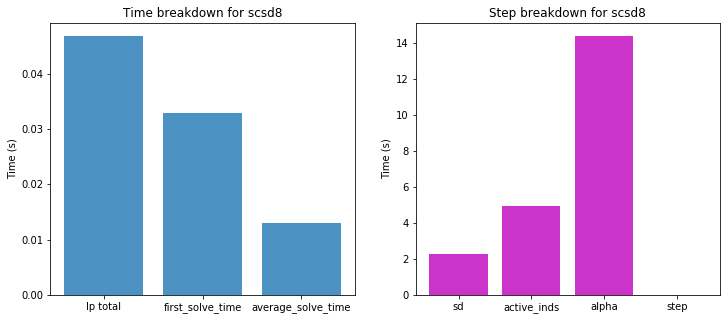

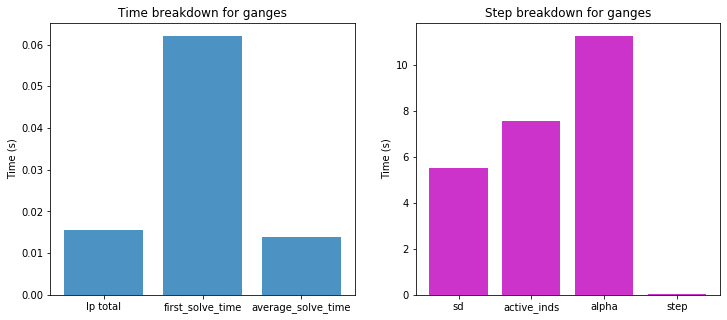

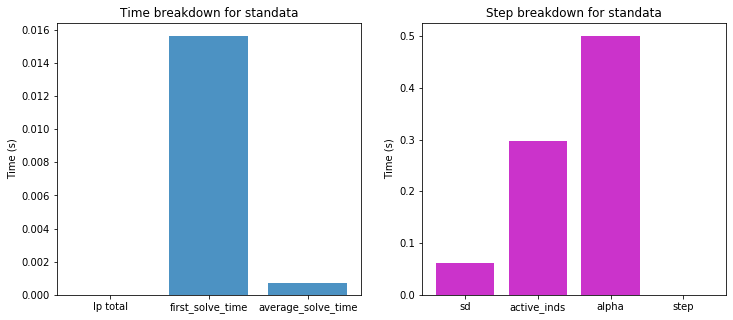

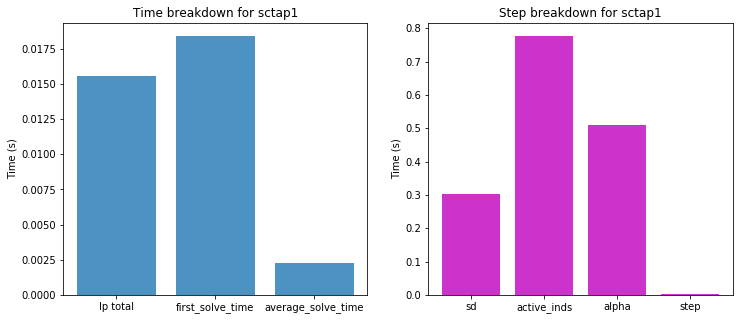

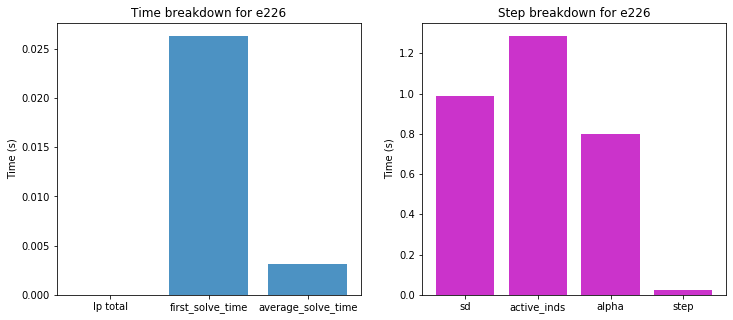

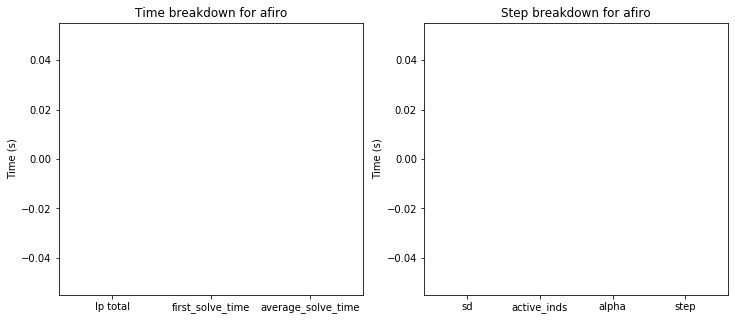

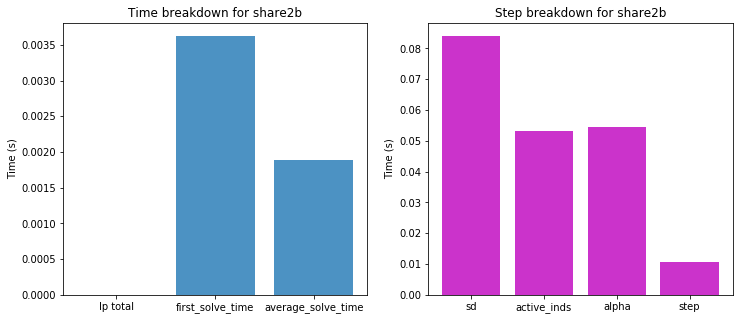

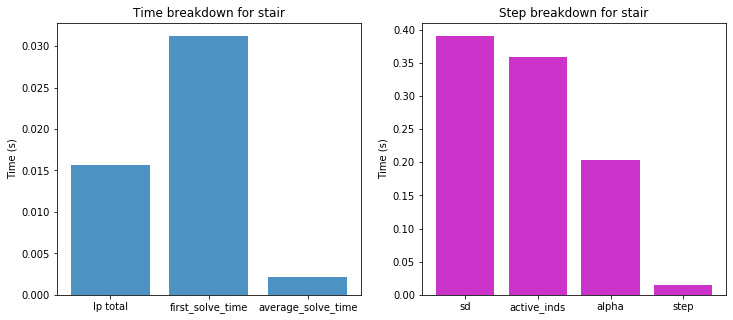

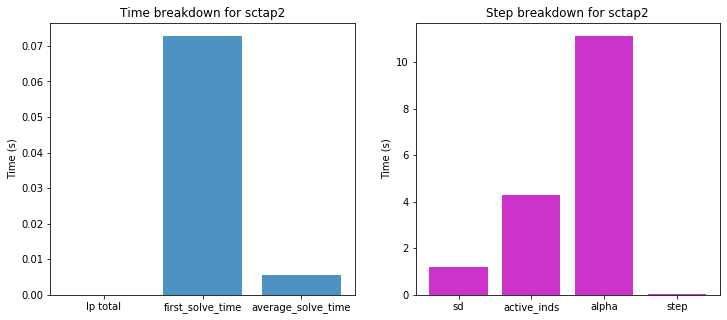

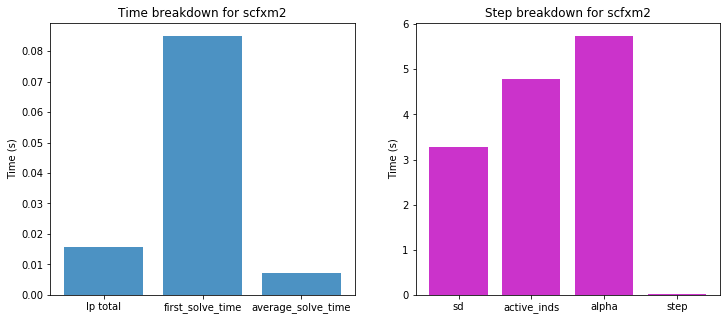

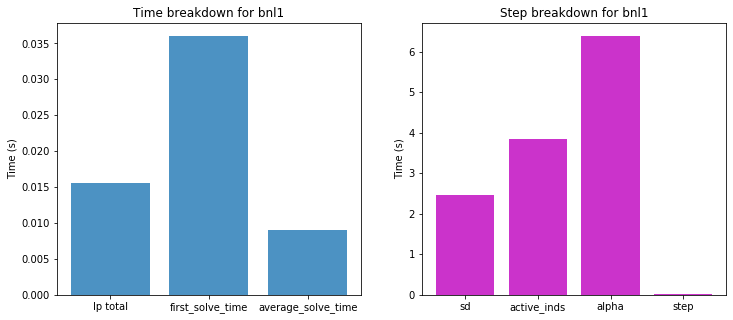

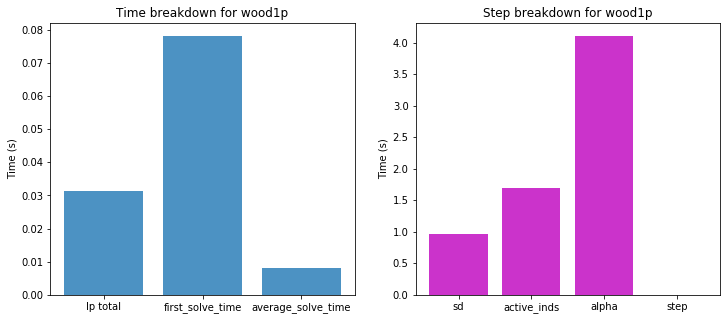

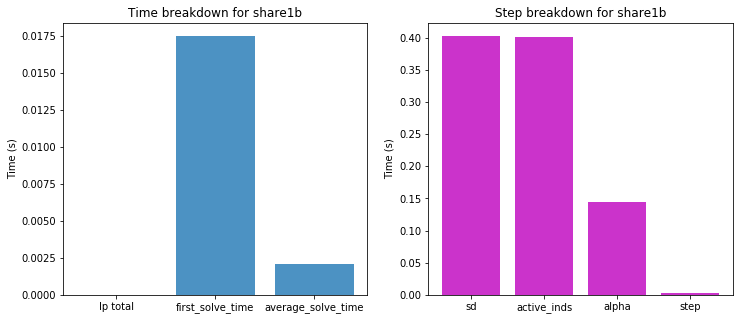

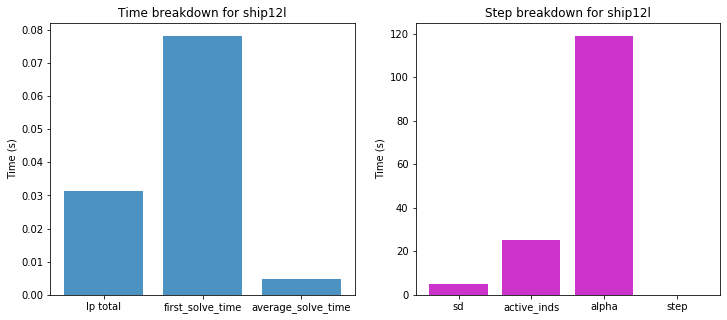

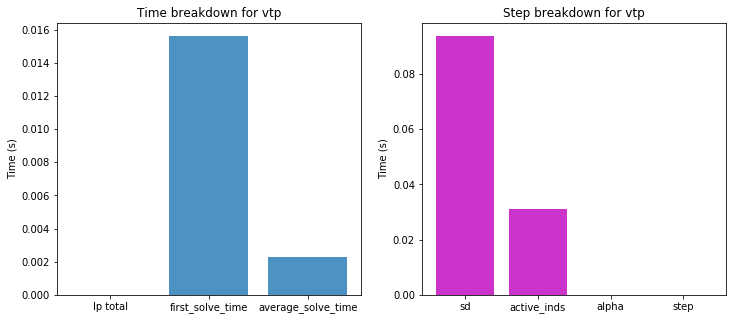

In [10]:
#inds = [0,1,2,3,4,5]
#inds = list(range(len(sd_results_fns)))
good_probs = []
max_solve_time = 200

for ind in inds[:max_probs]:
    lp_fn = lp_results_fns[ind]
    sd_fn = sd_results_fns[ind]
    problem_name = os.path.basename(lp_fn).split('_')[0]
    
    with open(lp_fn, 'rb') as f:
        lp_results = pickle.load(f)
    with open(sd_fn, 'rb') as f:
        sd_results = pickle.load(f)
        
    if sd_results['solve_time_total'] is None:
        continue
    if sd_results['solve_time_total'] > max_solve_time:
        continue
        
    good_probs.append(problem_name)
        
    times = {}
    #times['sd total'] = sd_results['solve_time_total']
    times['lp total'] = lp_results['solve_time_total']
    times['first_solve_time'] = sd_results['solve_times'][0]
    times['average_solve_time'] = avg(sd_results['solve_times'][1:])
    
    subtimes = {}
    subtimes['sd'] = sum(sd_results['sub_times']['sd'][1:])
    subtimes['active_inds'] = sum(sd_results['sub_times']['active_inds'][1:])
    subtimes['alpha'] = sum(sd_results['sub_times']['alpha'][1:])
    subtimes['step'] = sum(sd_results['sub_times']['step'][1:])
    #subtimes['solve'] = sum(sd_results['sub_times']['solve'][1:])
    
    
    time_types = [key for key in times]
    subtime_types = [key for key in subtimes]

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
    ax1.set_title('Time breakdown for {}'.format(problem_name))
    ax1.set_ylabel('Time (s)')
    x_pos = np.arange(len(time_types))
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(time_types)
    values = [times[key] for key in times]
    ax1.bar(x_pos, values, align='center', alpha=0.8)

    ax2.set_title('Step breakdown for {}'.format(problem_name))
    ax2.set_ylabel('Time (s)')
    x_pos = np.arange(len(subtime_types))
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(subtime_types)
    values = [subtimes[key] for key in subtimes]
    ax2.bar(x_pos, values, align='center', alpha=0.8, color='m')
    f.show()  
    

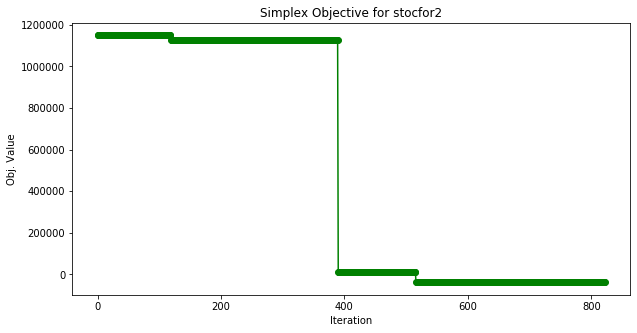

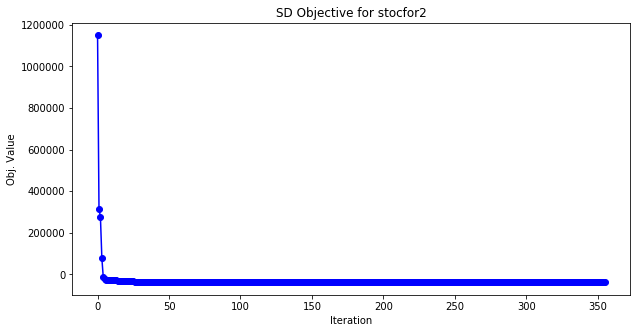

C:\Users\Chase\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


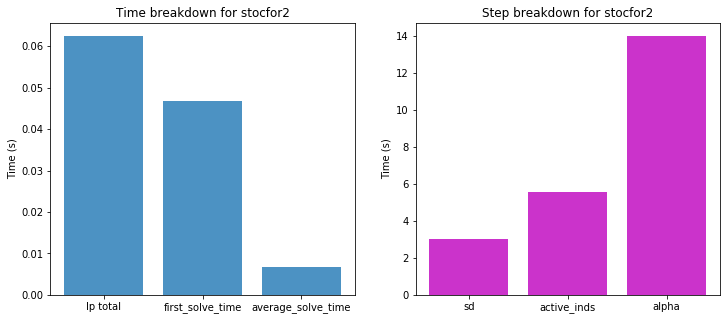

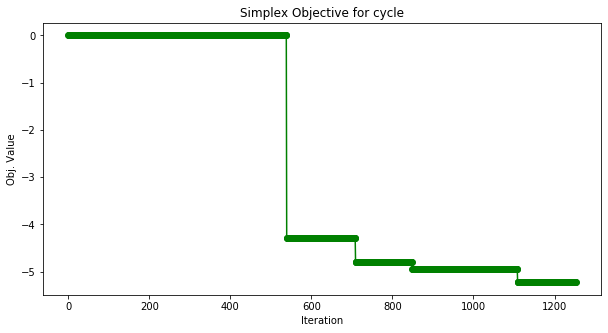

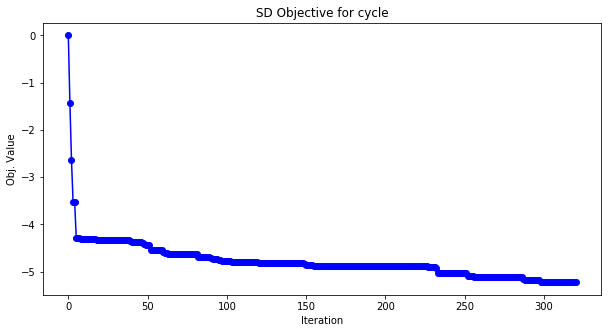

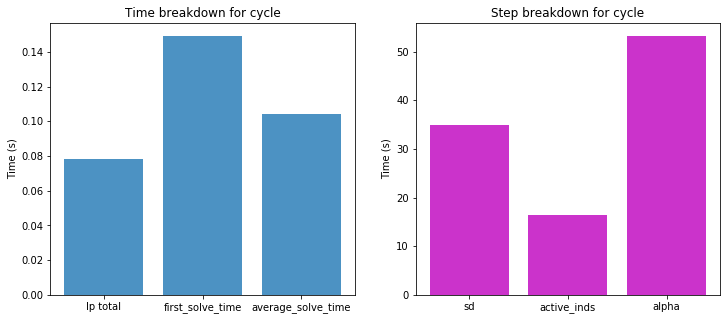

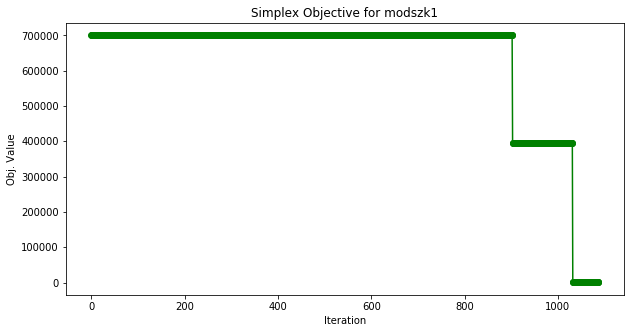

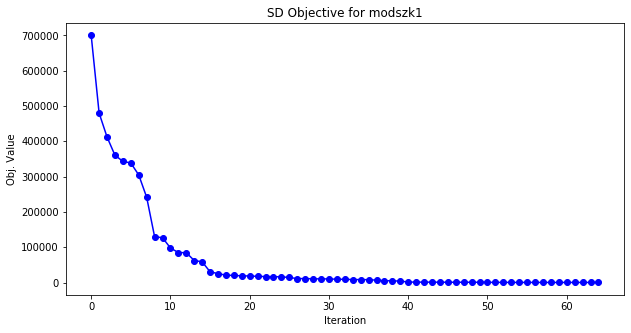

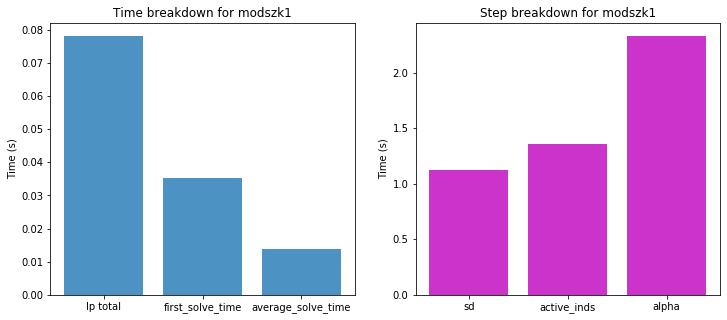

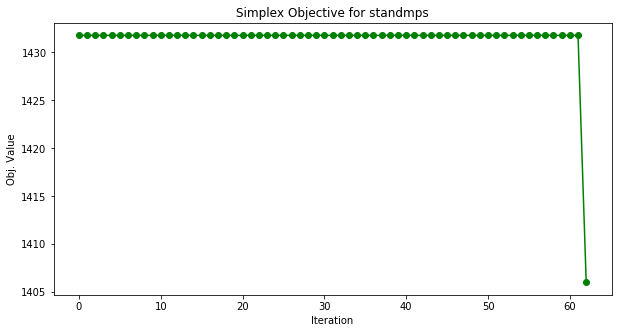

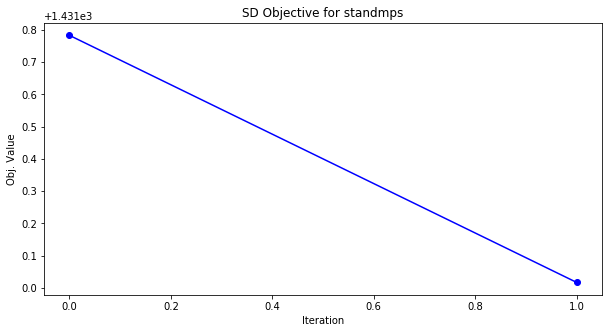

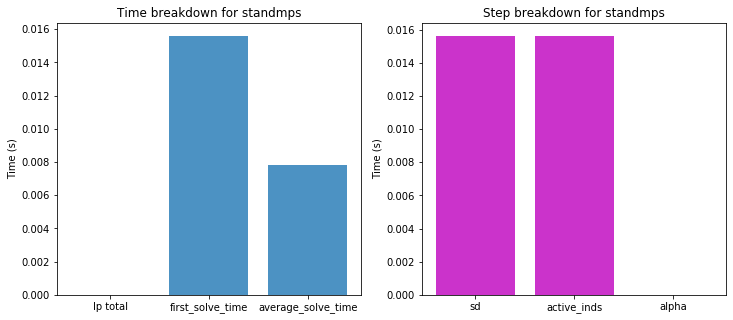

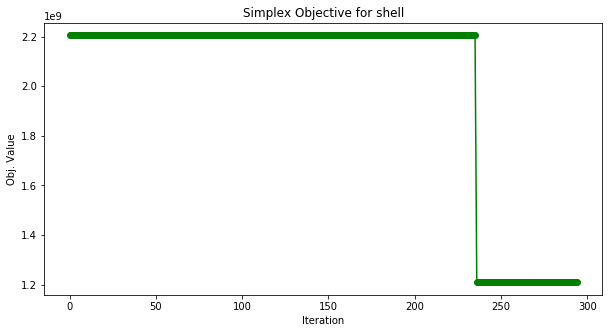

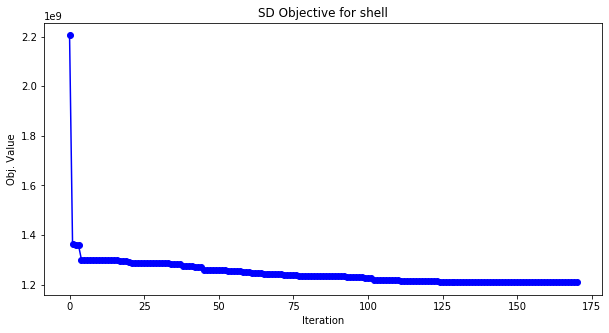

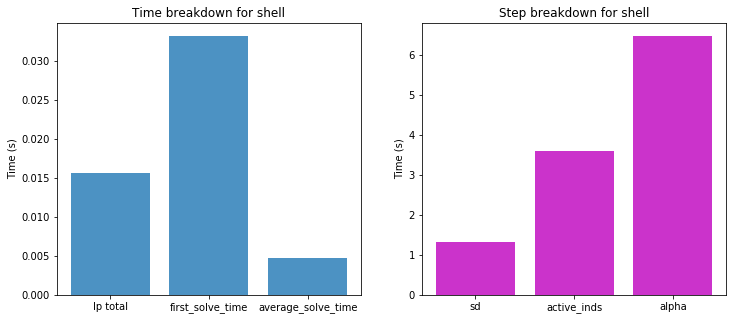

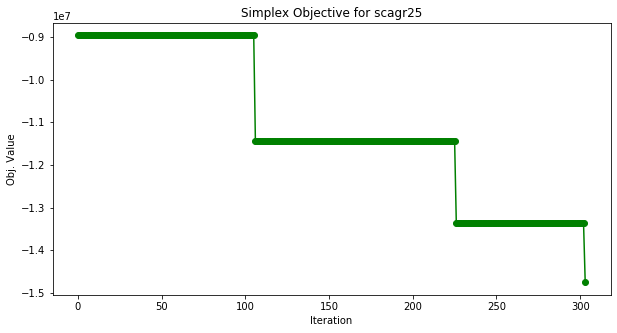

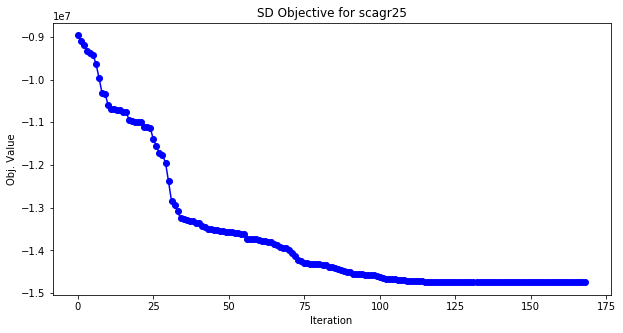

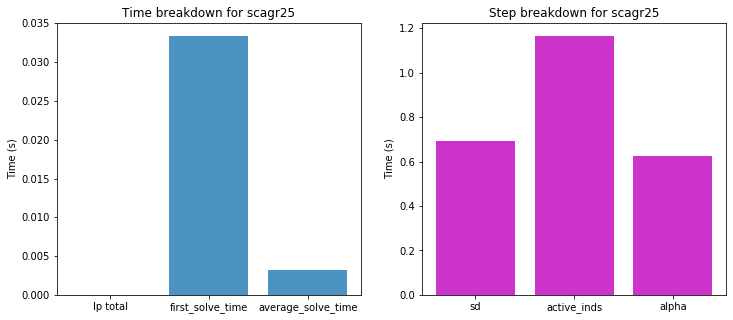

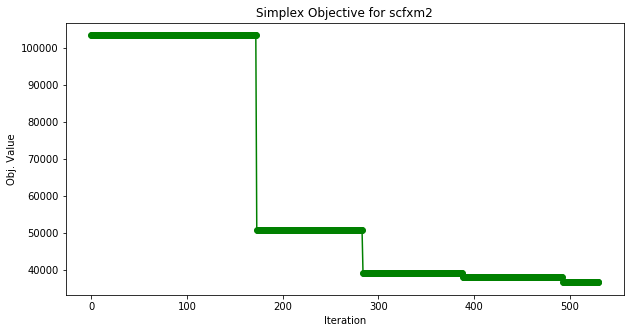

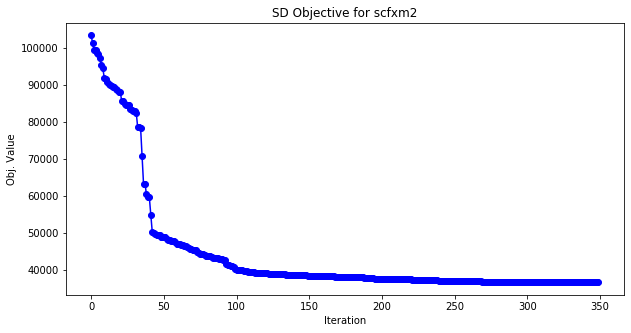

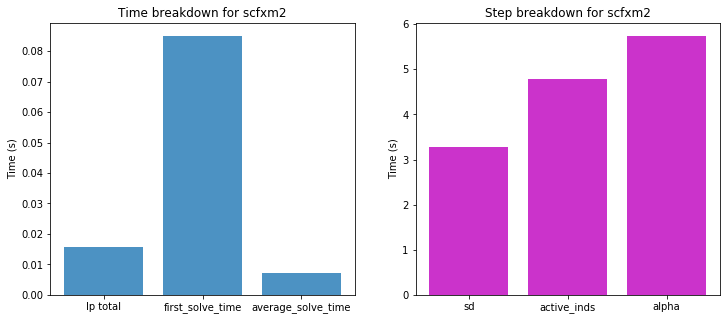

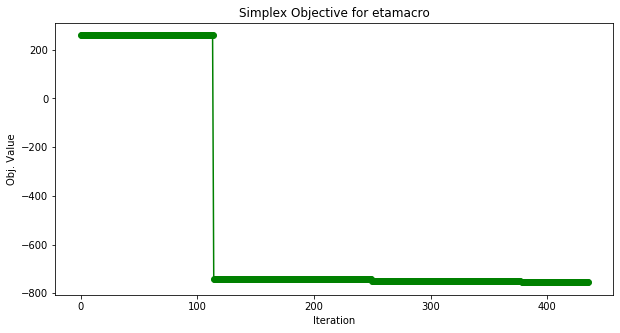

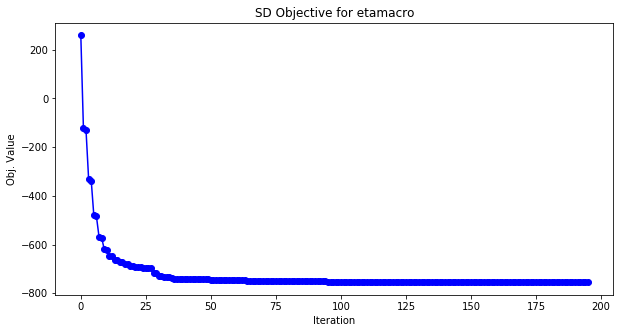

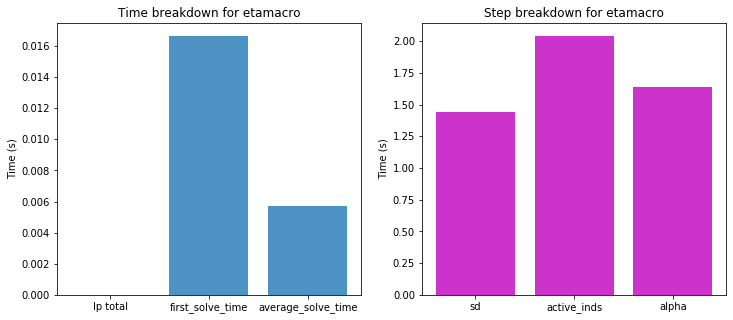

In [3]:
problems = ['stocfor2', 'cycle', 'modszk1', 'standmps', 'shell',
            'scagr25', 'scfxm2', 'etamacro']
results_dir = 'results2'
for problem in problems:
    lp_fn = os.path.join(results_dir, problem + '_lp.p')
    sd_fn = os.path.join(results_dir, problem + '_sd.p')
    problem_name = problem
    
    with open(lp_fn, 'rb') as f:
        lp_results = pickle.load(f)
    with open(sd_fn, 'rb') as f:
        sd_results = pickle.load(f)
        
    lp_results['obj_values'].append(lp_results['obj'])    
    plt.figure(figsize=(10,5))
    plt.title('Simplex Objective for {}'.format(problem_name))
    plt.xlabel('Iteration')
    plt.ylabel('Obj. Value')
    plt.plot(list(range(len(lp_results['obj_values']))), lp_results['obj_values'], 'go-')
    plt.show()
    
    plt.figure(figsize=(10,5))
    plt.title('SD Objective for {}'.format(problem_name))
    plt.xlabel('Iteration')
    plt.ylabel('Obj. Value')
    plt.plot(list(range(len(sd_results['obj_values']))), sd_results['obj_values'], 'bo-')
    plt.show()
    
    times = {}
    #times['sd total'] = sd_results['solve_time_total']
    times['lp total'] = lp_results['solve_time_total']
    times['first_solve_time'] = sd_results['solve_times'][0]
    times['average_solve_time'] = avg(sd_results['solve_times'][1:])
    
    subtimes = {}
    subtimes['sd'] = sum(sd_results['sub_times']['sd'][1:])
    subtimes['active_inds'] = sum(sd_results['sub_times']['active_inds'][1:])
    subtimes['alpha'] = sum(sd_results['sub_times']['alpha'][1:])
    #subtimes['step'] = sum(sd_results['sub_times']['step'][1:])
    #subtimes['solve'] = sum(sd_results['sub_times']['solve'][1:])
       
    time_types = [key for key in times]
    subtime_types = [key for key in subtimes]

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
    ax1.set_title('Time breakdown for {}'.format(problem_name))
    ax1.set_ylabel('Time (s)')
    x_pos = np.arange(len(time_types))
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(time_types)
    values = [times[key] for key in times]
    ax1.bar(x_pos, values, align='center', alpha=0.8)

    ax2.set_title('Step breakdown for {}'.format(problem_name))
    ax2.set_ylabel('Time (s)')
    x_pos = np.arange(len(subtime_types))
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(subtime_types)
    values = [subtimes[key] for key in subtimes]
    ax2.bar(x_pos, values, align='center', alpha=0.8, color='m')
    f.show()  
    